In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Import own libraries 
import os, sys
script_path = os.path.realpath(os.path.dirname("10_on_trajectories"))
os.chdir(script_path)
sys.path.append("..")

from myLibraries.queries import * 
from myLibraries.events import *
from myLibraries.theoretical_functions import *

In [2]:
EVENTS = get_collabs_event()
ALL_EVENTS = get_allEvents(EVENTS)
START_Y_DISTANCE = 4
YEARS = get_str_years_event()

In [3]:
# focal_control.csv contains 13614 authors, but only 5459 of are the the collaboration.csv
# of those 5459 there are only 2910 focal+control couples 
# The "start_year" indicated in the focal_control.csv doesen't match the one in publication data

# **GRANTED and NOT GRANTED trajectories**

In [4]:
foc_con = get_all_granting_data() # funding data for which we have collaboration data and for each focal we have a control

granted = get_granted() # get just the granted data
not_granted = get_not_granted() #get just the not granted data

foc_con.sort_values("group")

,ID,group,focal,anr_year,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,start_year,end_year,max_hole_size,activity,tot_pubs
2327,7102002323,6,0,2015,0,0,0,0,0,0,...,26,32,32,34,38,2003,2018,2,15,20
2326,10140643700,6,1,2014,0,0,0,0,0,0,...,53,64,67,80,86,2001,2018,1,17,70
2825,7006104157,8,0,2006,0,0,0,0,0,0,...,49,49,49,49,49,1997,2012,9,15,5
2824,10142501400,8,1,2012,0,0,0,0,0,0,...,32,32,38,41,48,2003,2018,1,15,52
150,10239292700,13,1,2010,0,0,0,0,0,0,...,26,52,52,56,56,2009,2017,2,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,23974287400,6801,0,2014,0,0,0,0,0,0,...,22,24,24,24,24,2007,2017,1,10,31
2744,9939279300,6804,1,2015,0,0,0,0,0,0,...,5,5,5,5,5,2009,2013,2,4,3
2745,6601960478,6804,0,2013,0,0,2,2,2,5,...,52,52,53,56,56,1992,2018,2,26,62
2748,48360905400,6805,0,2015,0,0,0,0,0,0,...,8,10,10,12,12,2011,2017,1,6,11


## (1.3) Trajectories

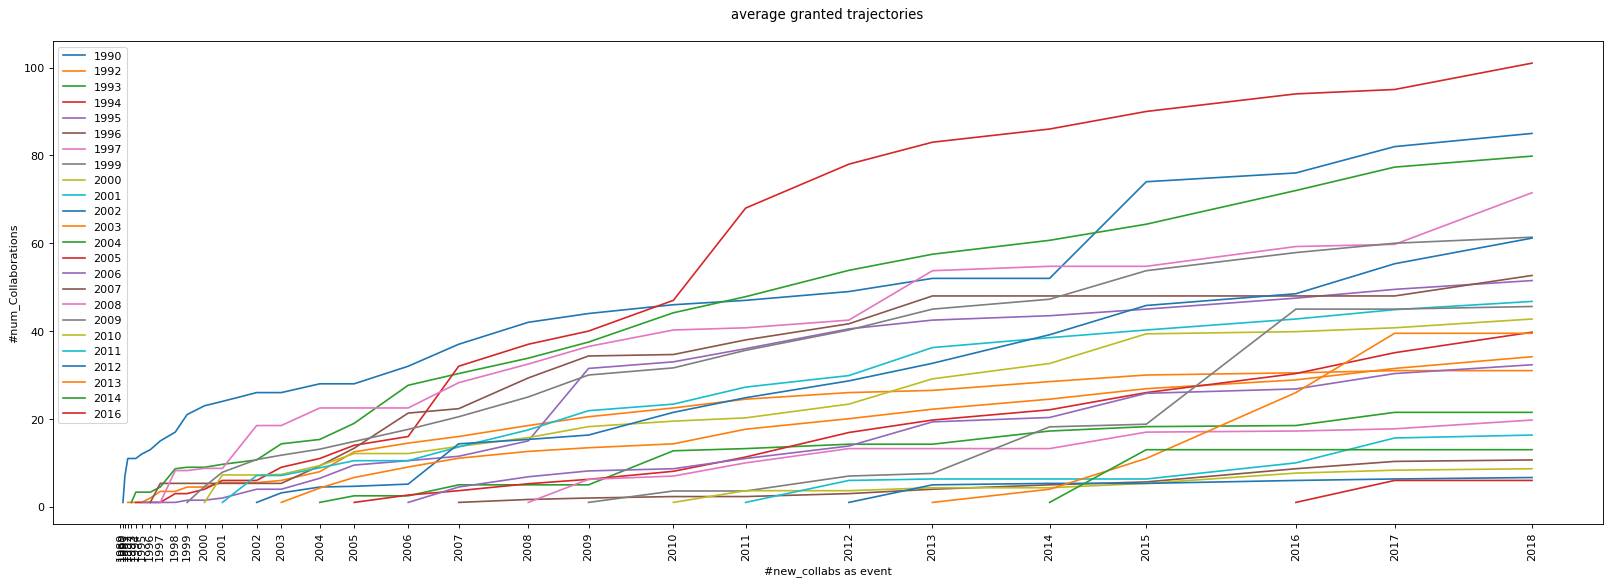

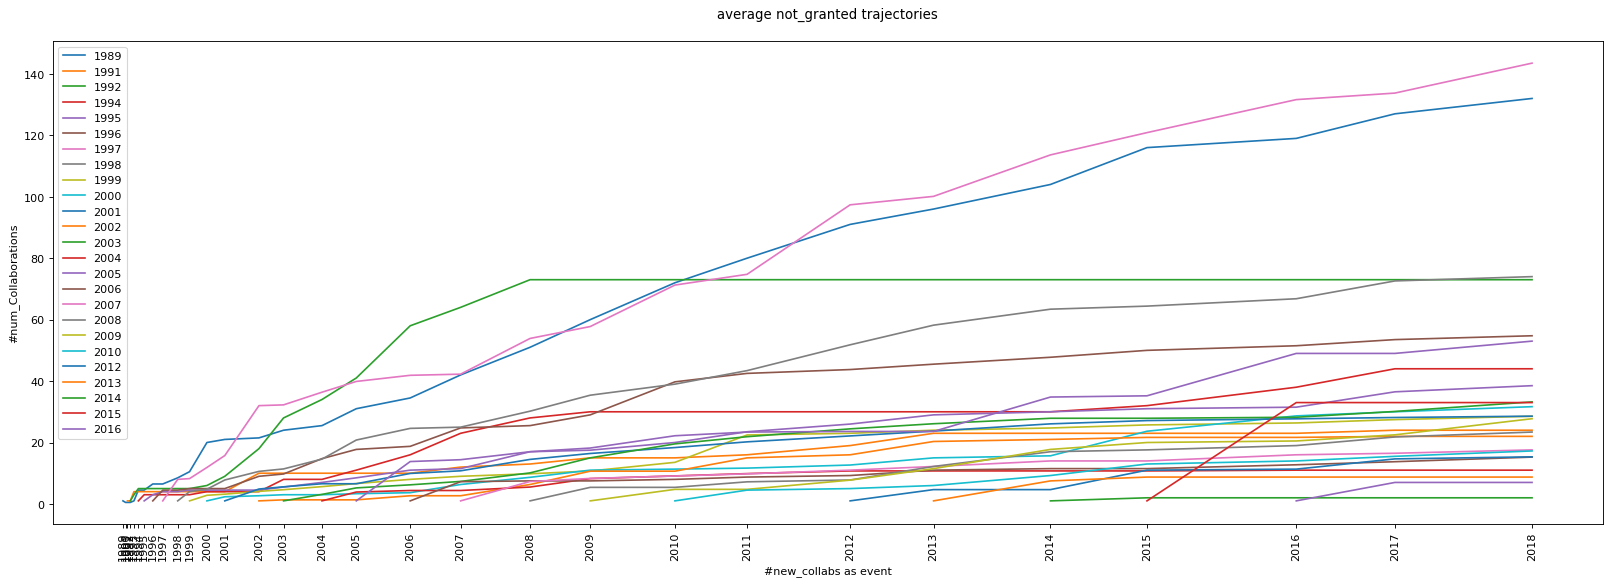

In [36]:
## plot avg granted trajectories (all at once)
plt.figure(figsize=(25, 8), dpi=80)
plt.title("average granted trajectories\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

for start_y in YEARS:
    # get trajectories 
    focal_x, focal_avg = get_focals_avg_trajectories(EVENTS, start_y, START_Y_DISTANCE) 
    if(focal_avg != []):        
        plt.plot(focal_x, focal_avg, label=start_y)

plt.legend(loc='upper left')
plt.xticks(EVENTS, YEARS)
plt.show()


## plot avg not_granted trajectories (all at once)
plt.figure(figsize=(25, 8), dpi=80)
plt.title("average not_granted trajectories\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

for start_y in YEARS:   
    # get trajectories 
    control_x, control_avg = get_controls_avg_trajectories(EVENTS, start_y, START_Y_DISTANCE)
    if(control_avg != []):
        plt.plot(control_x, control_avg, label=start_y)

plt.legend(loc='upper left')
plt.xticks(EVENTS, YEARS)
plt.show()


## all averages one by one

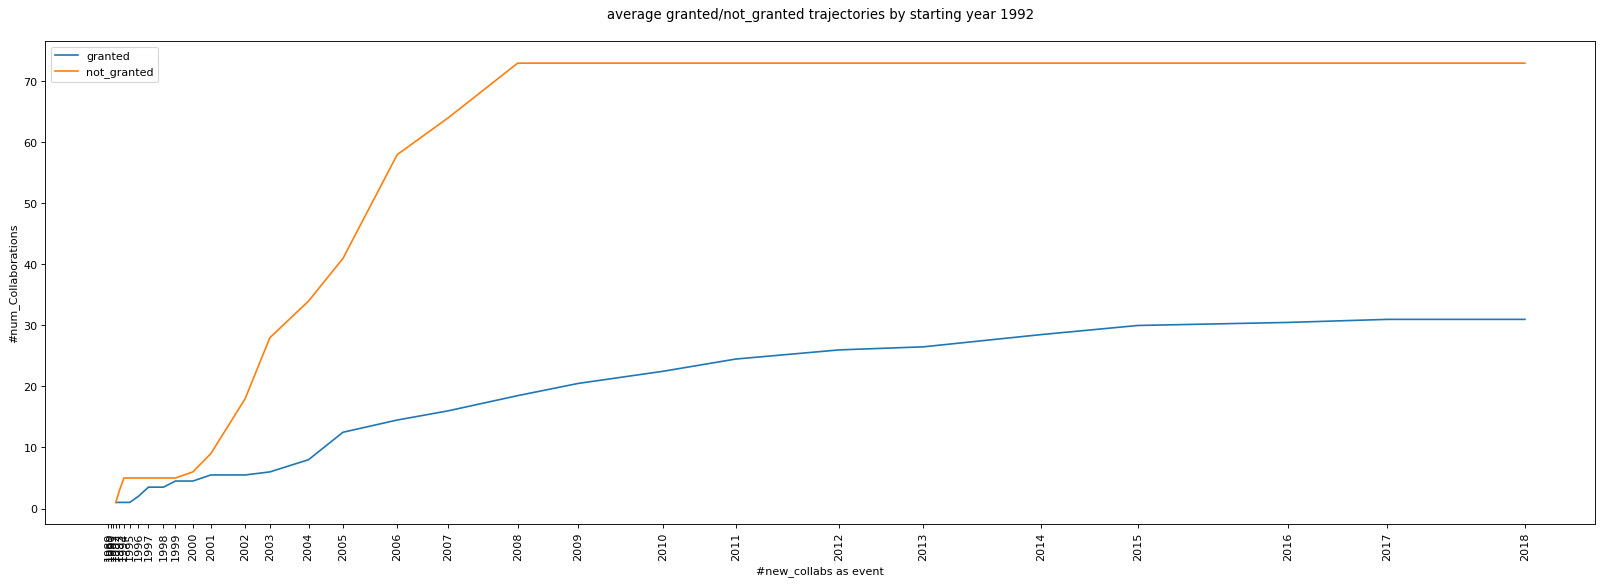

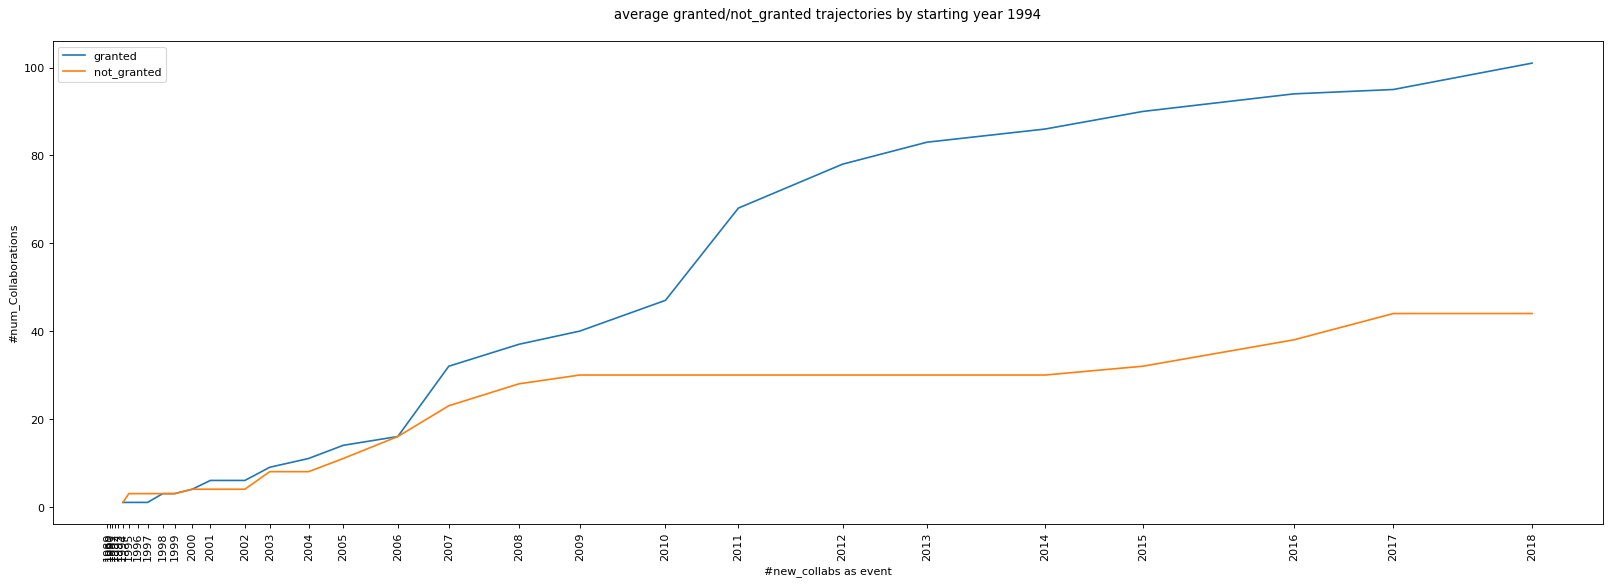

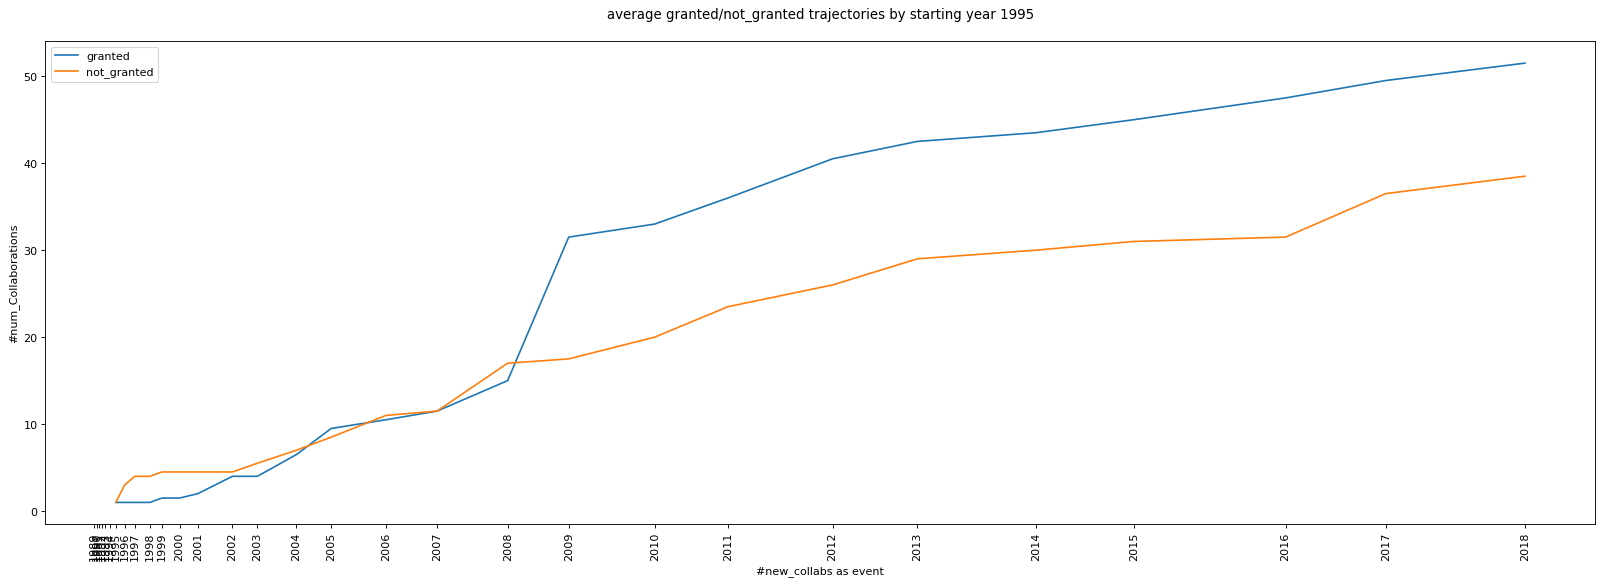

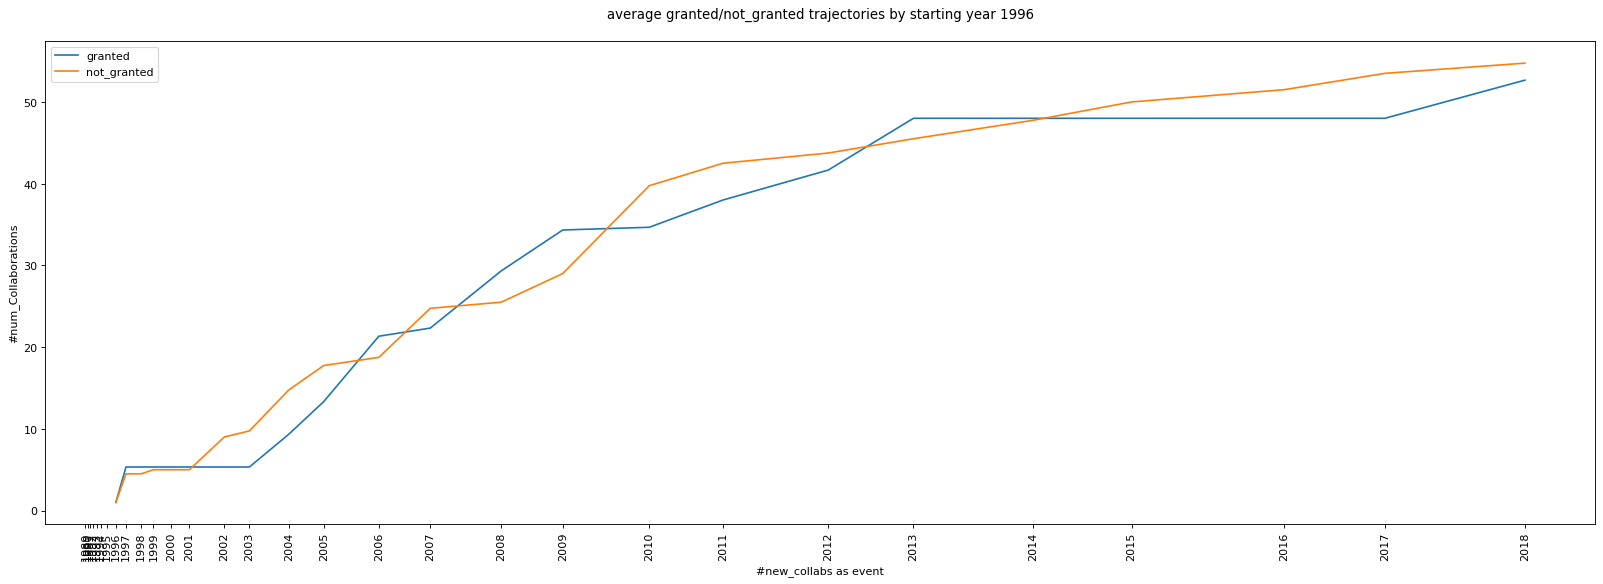

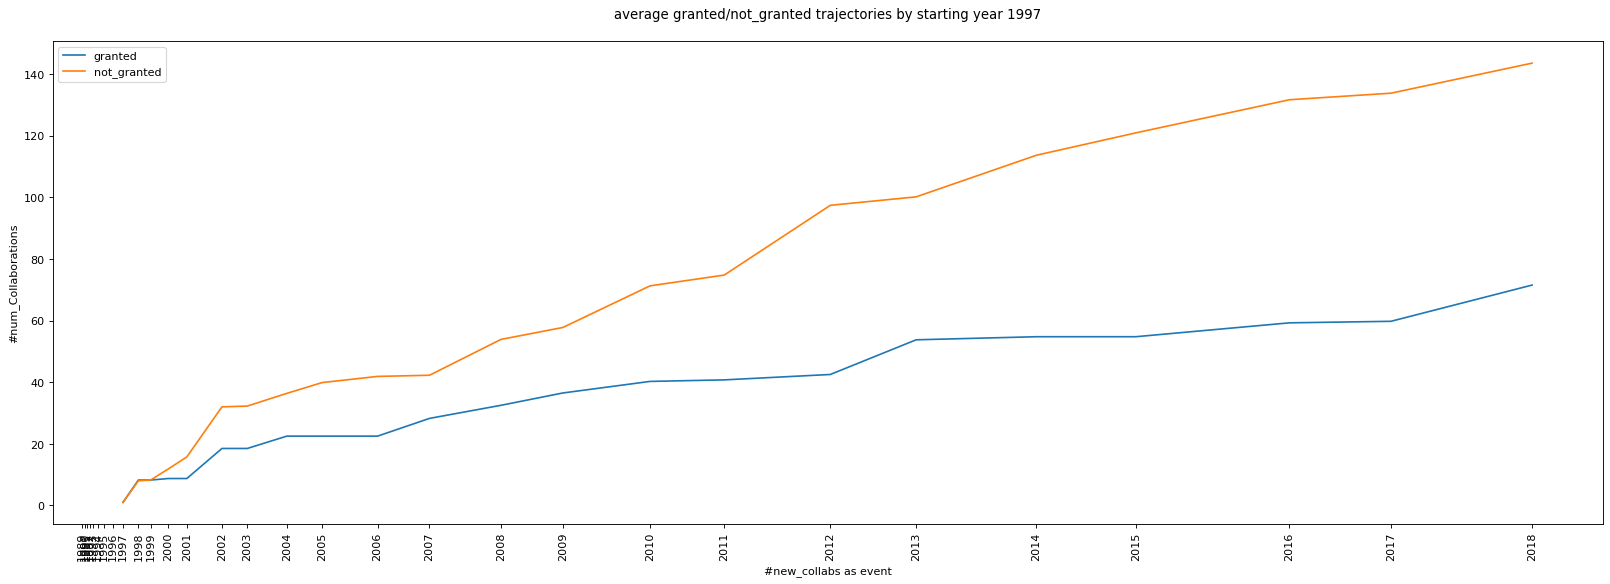

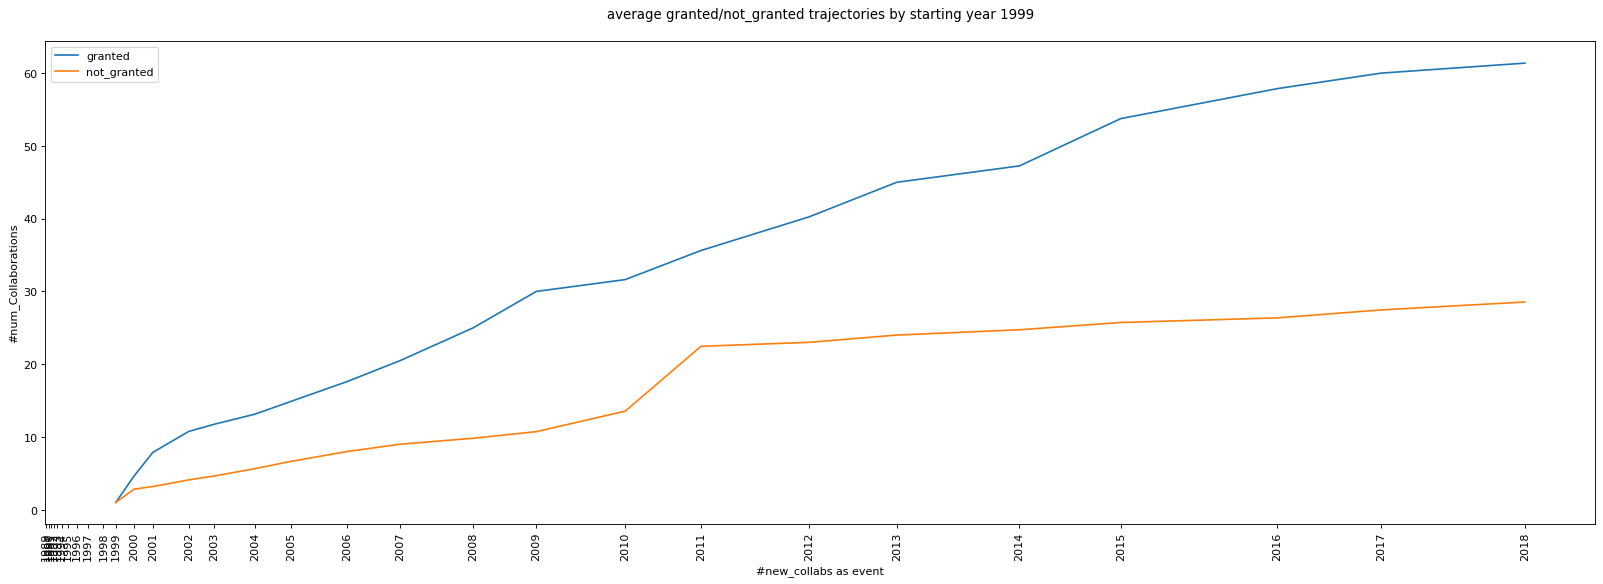

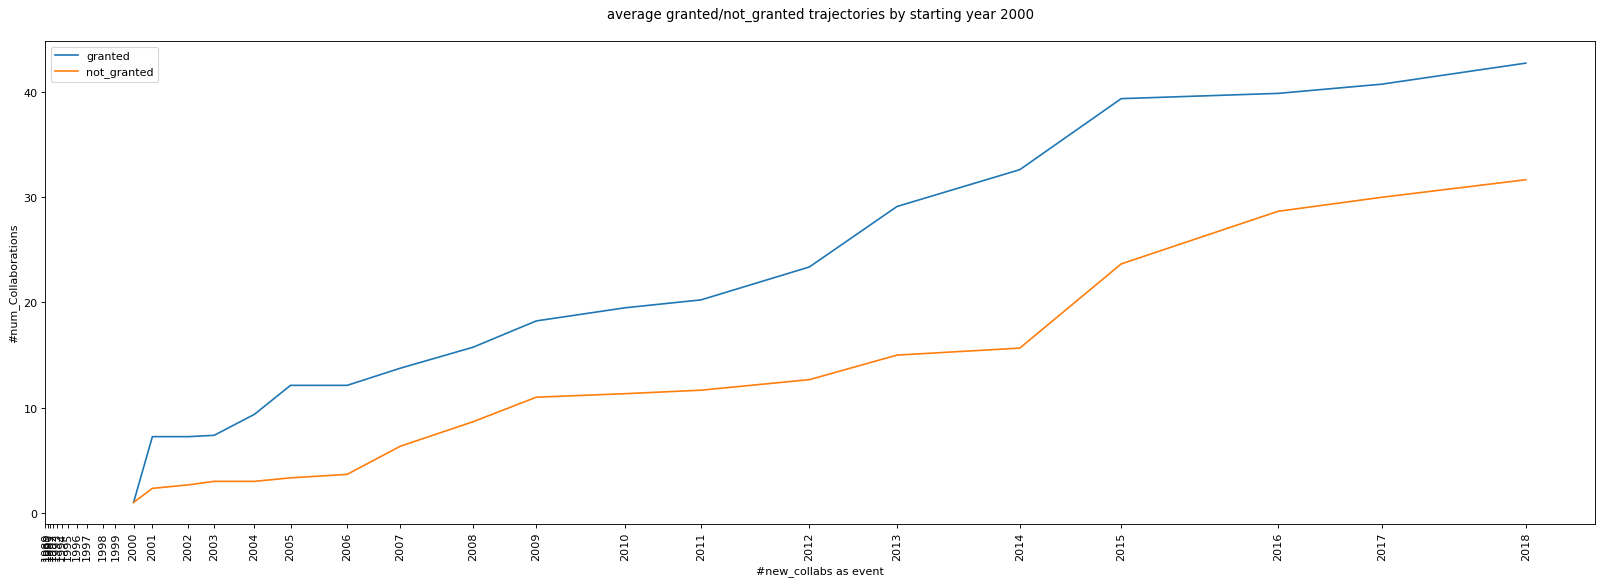

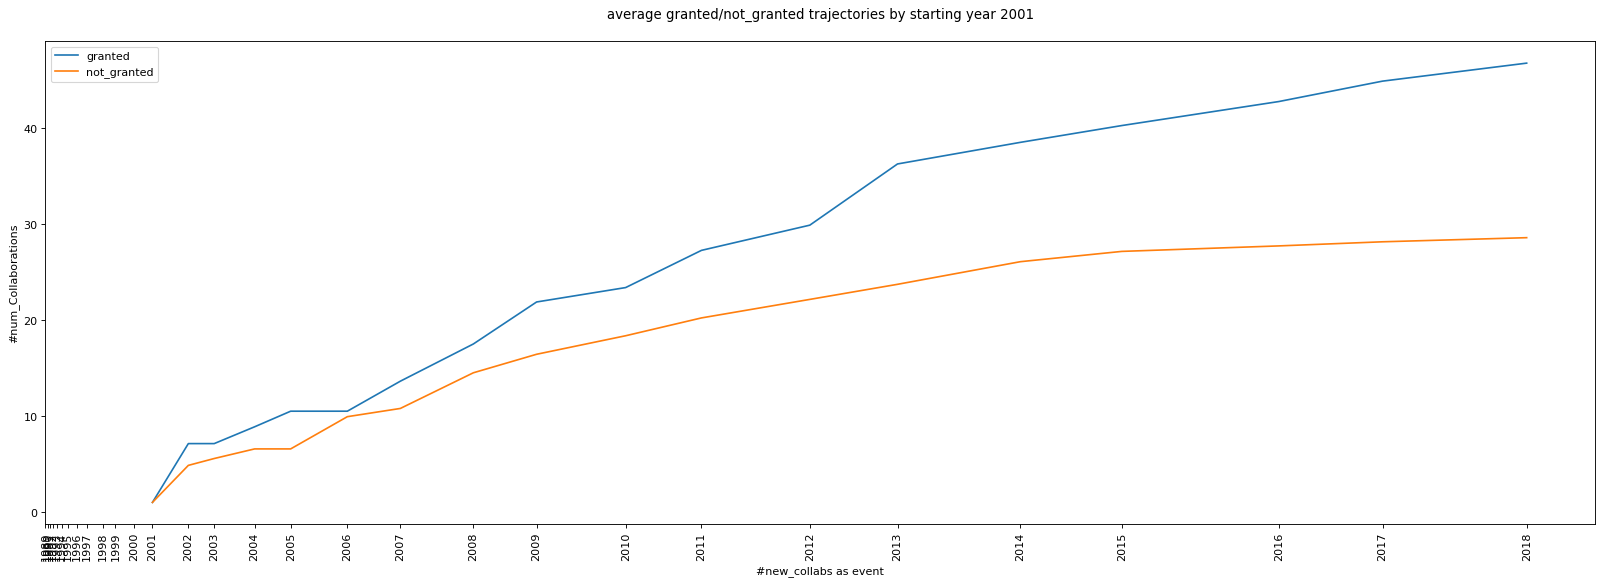

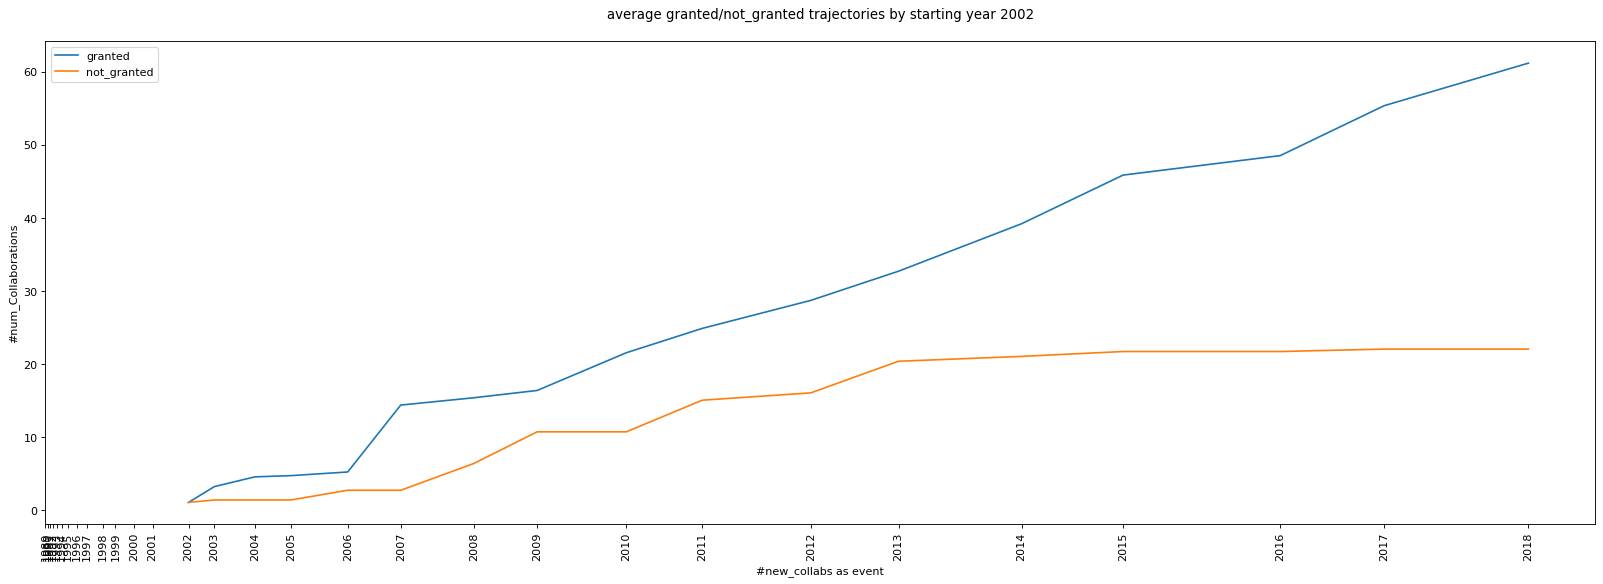

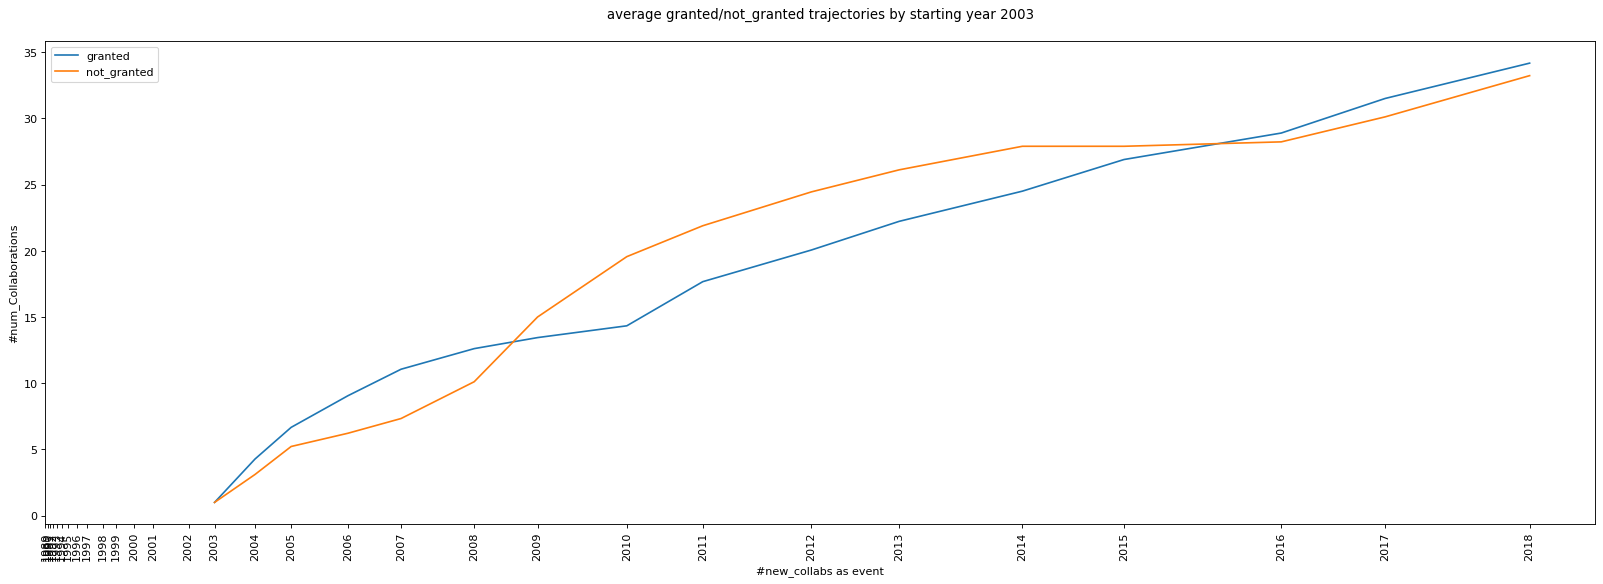

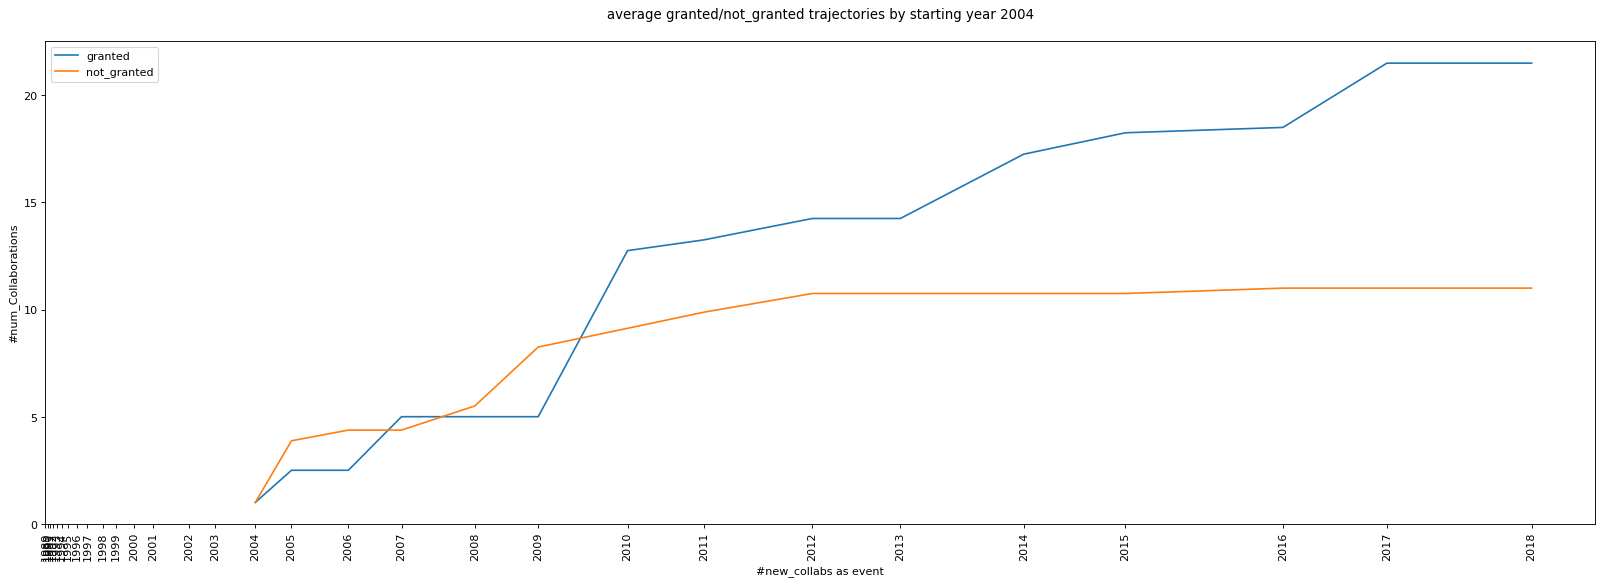

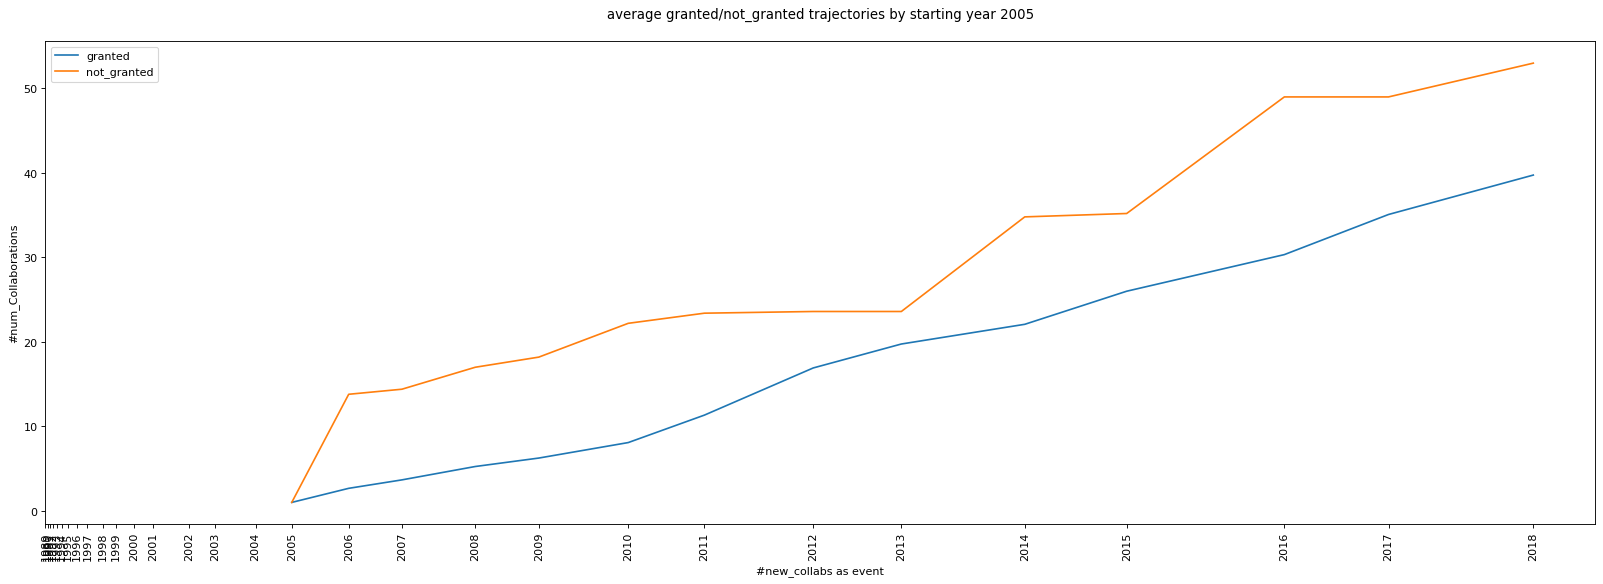

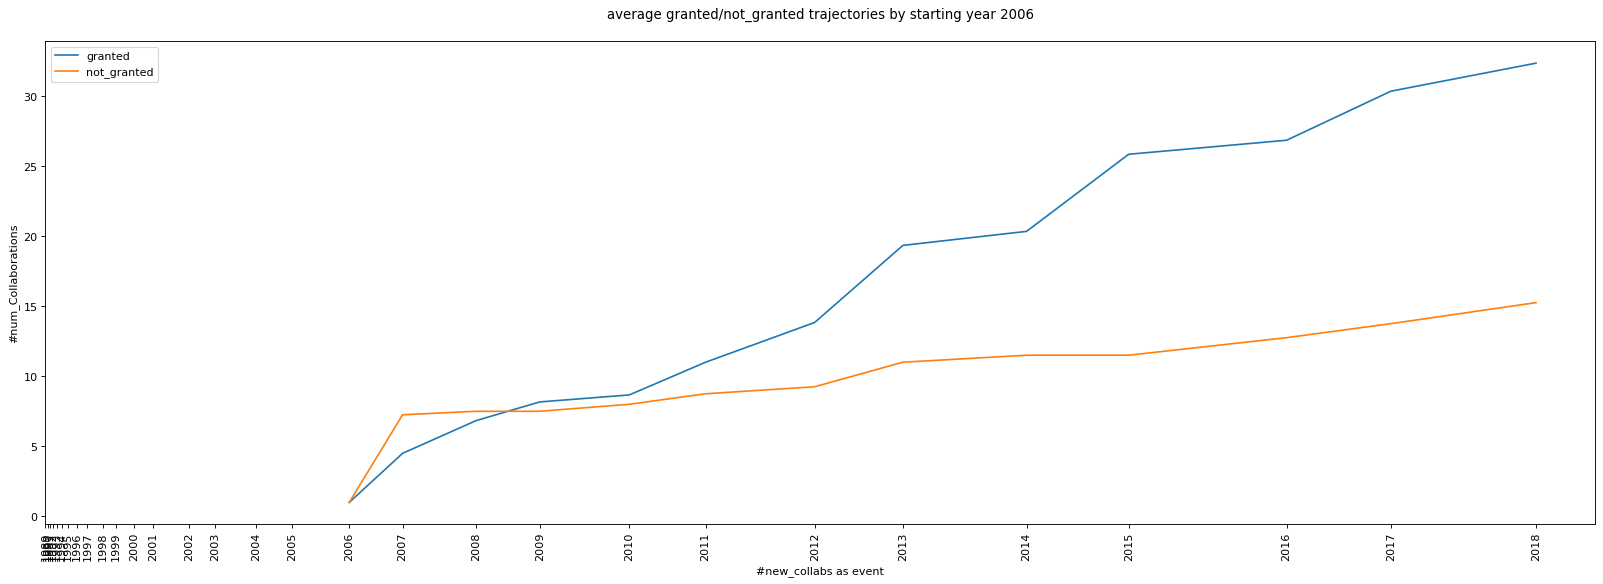

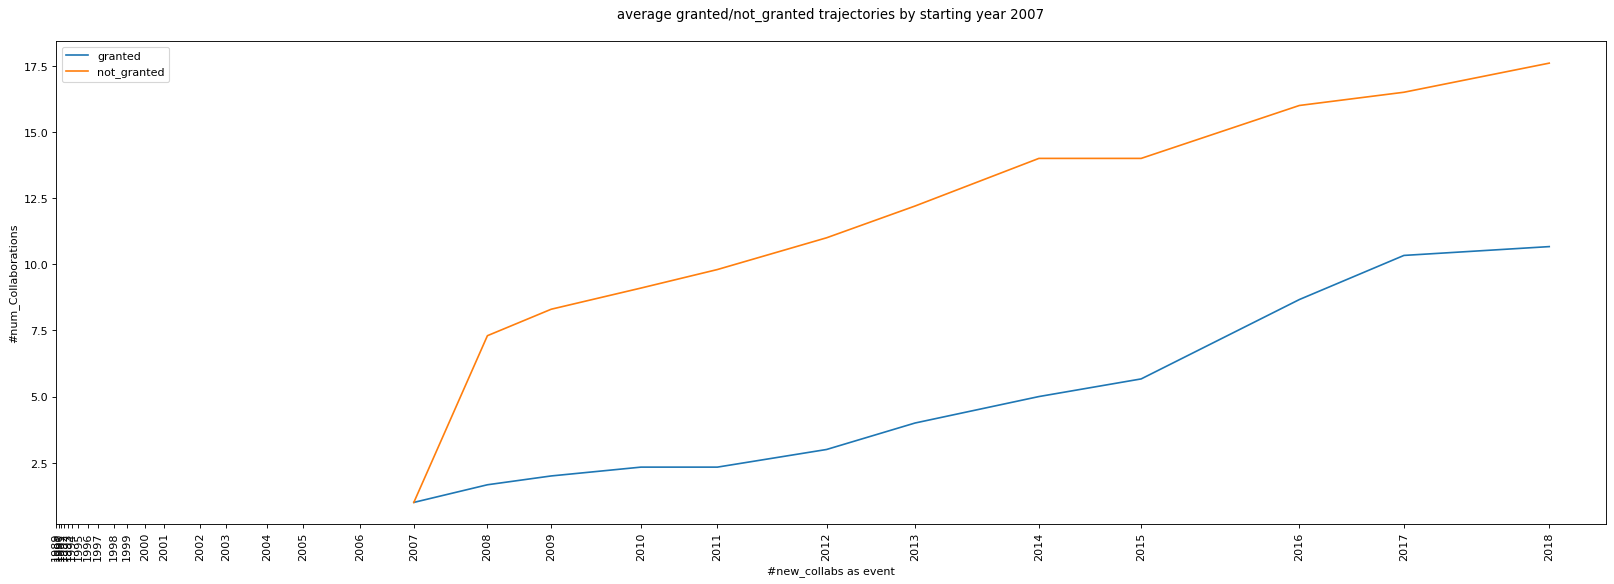

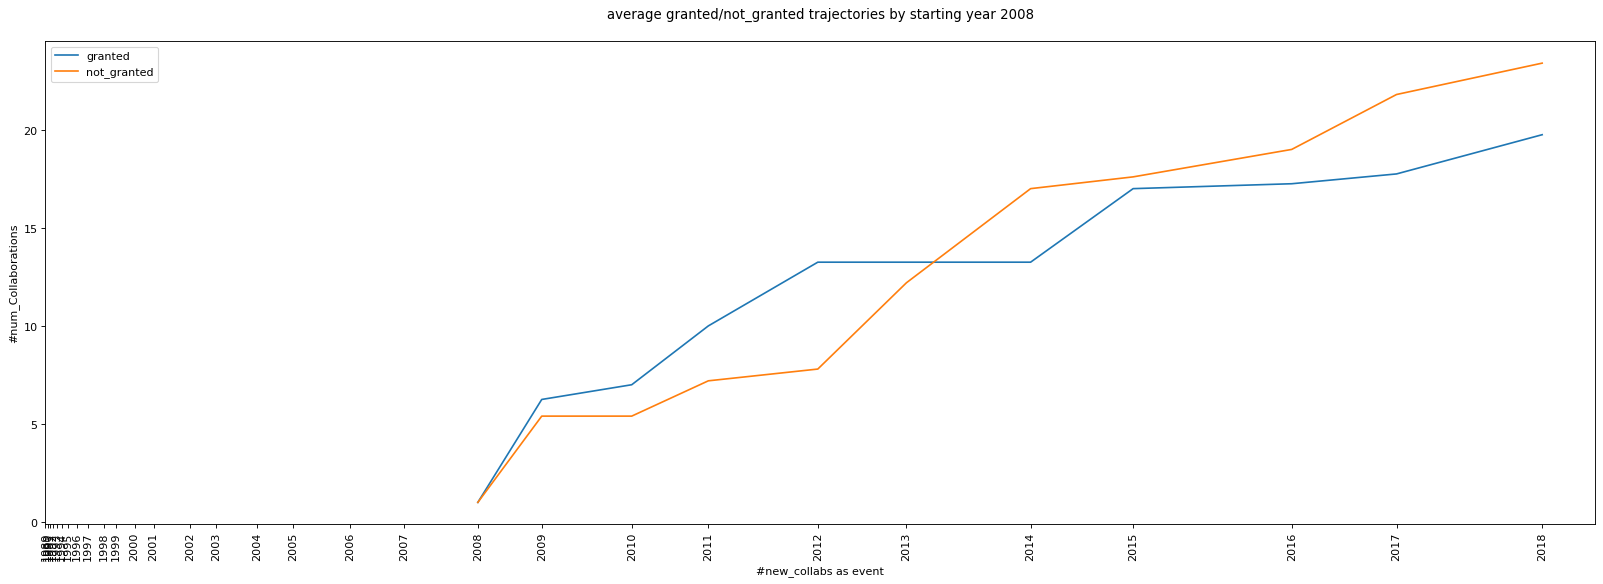

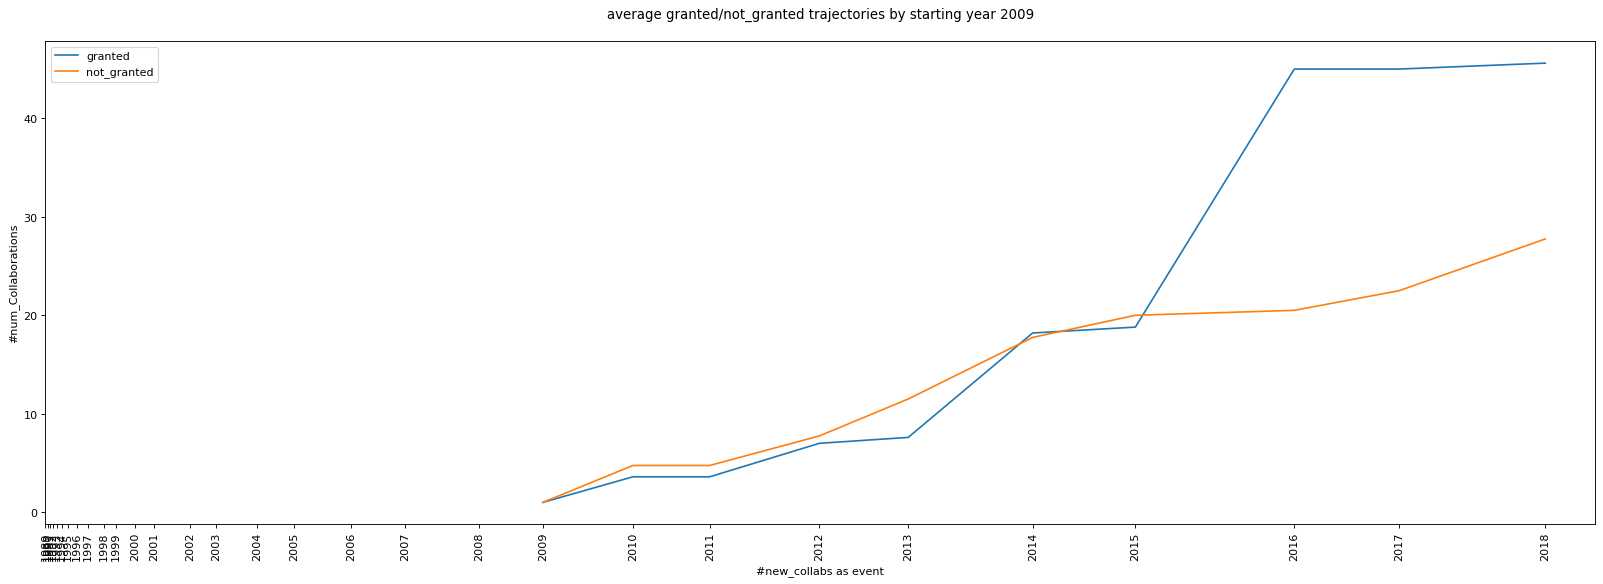

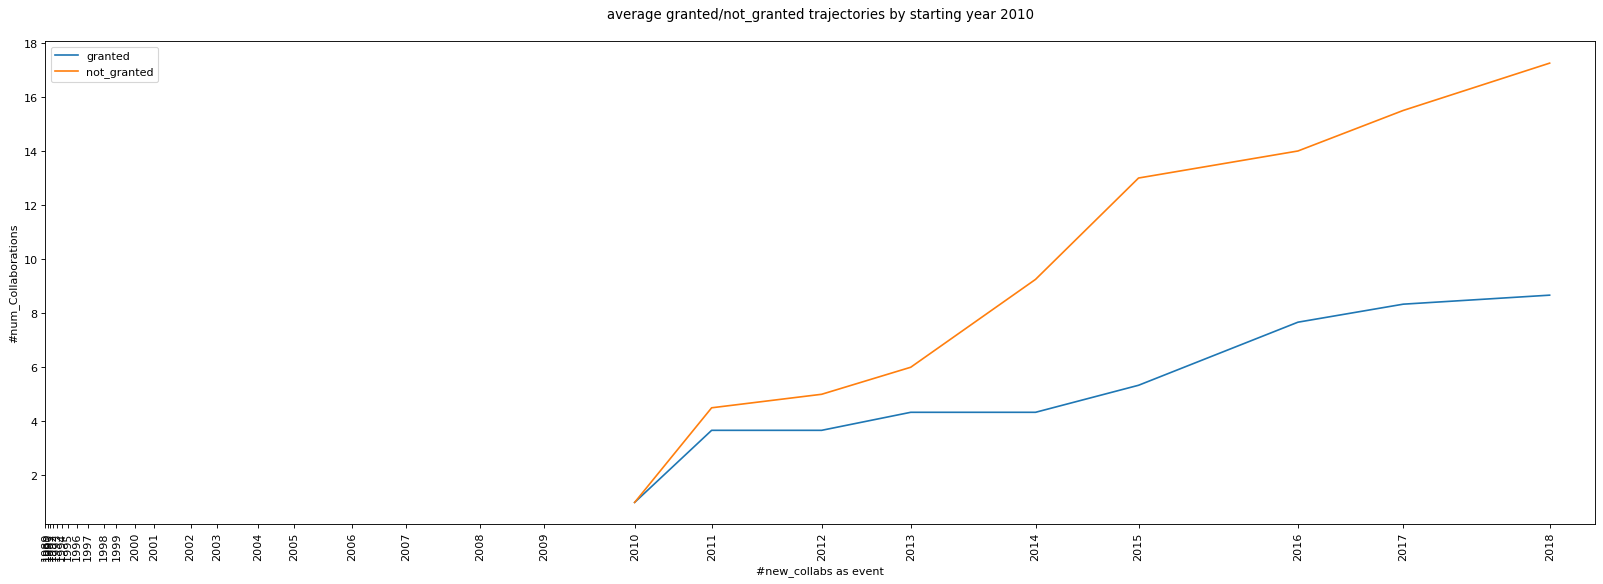

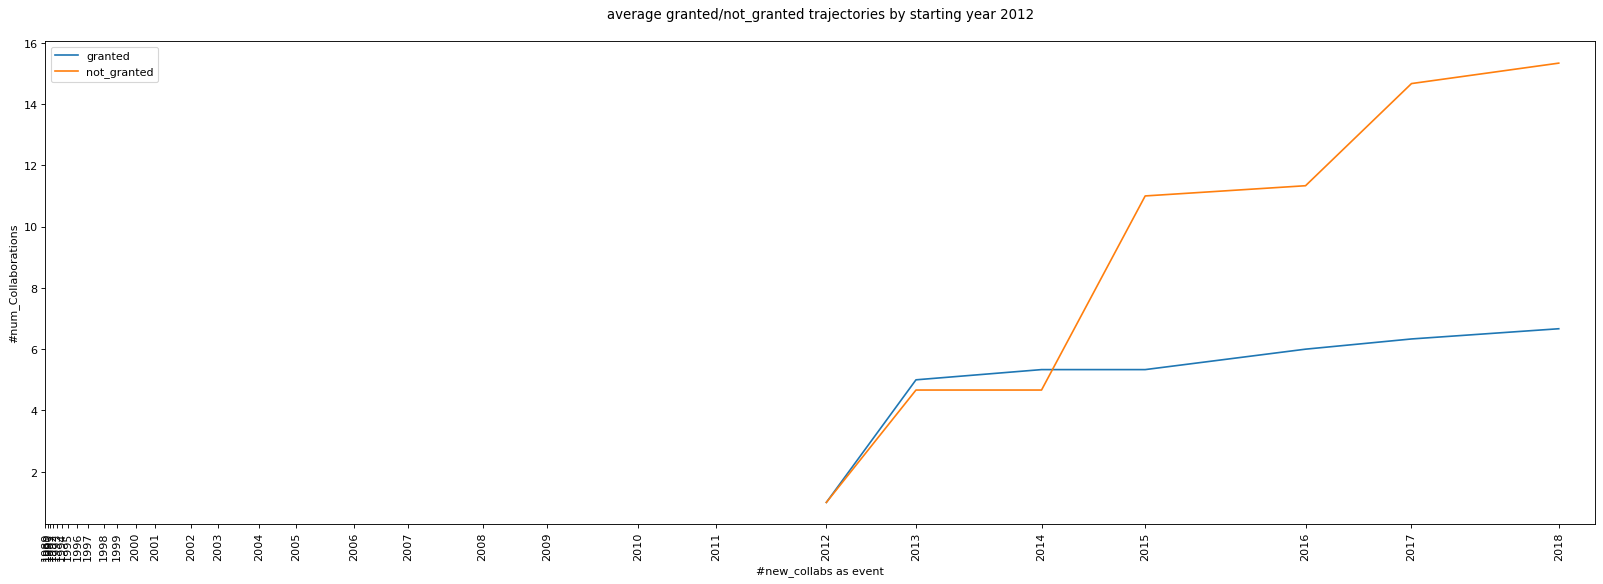

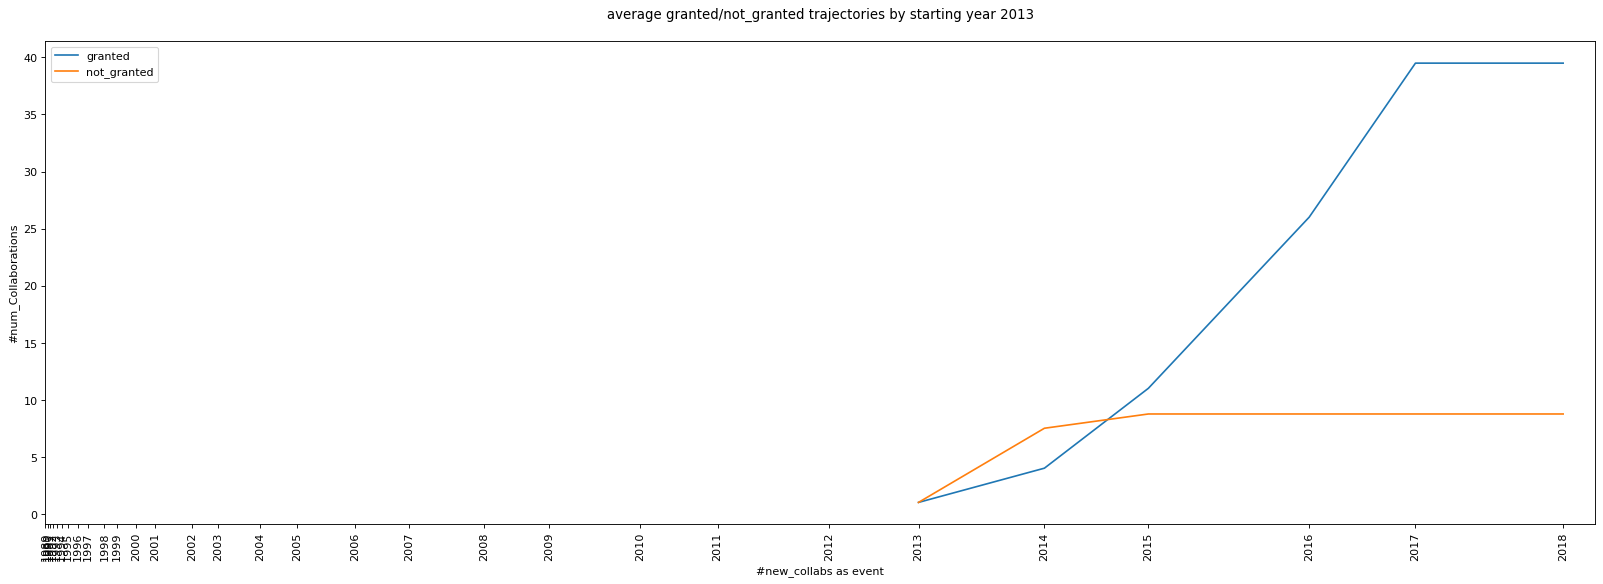

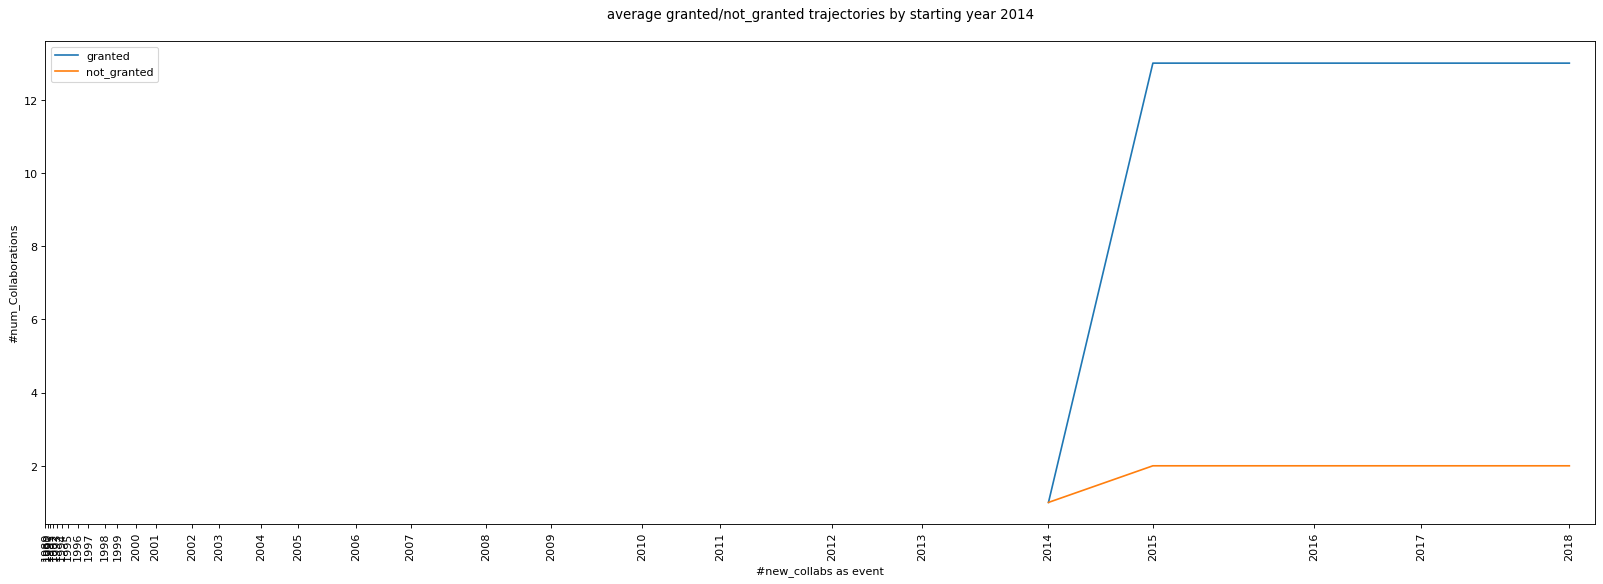

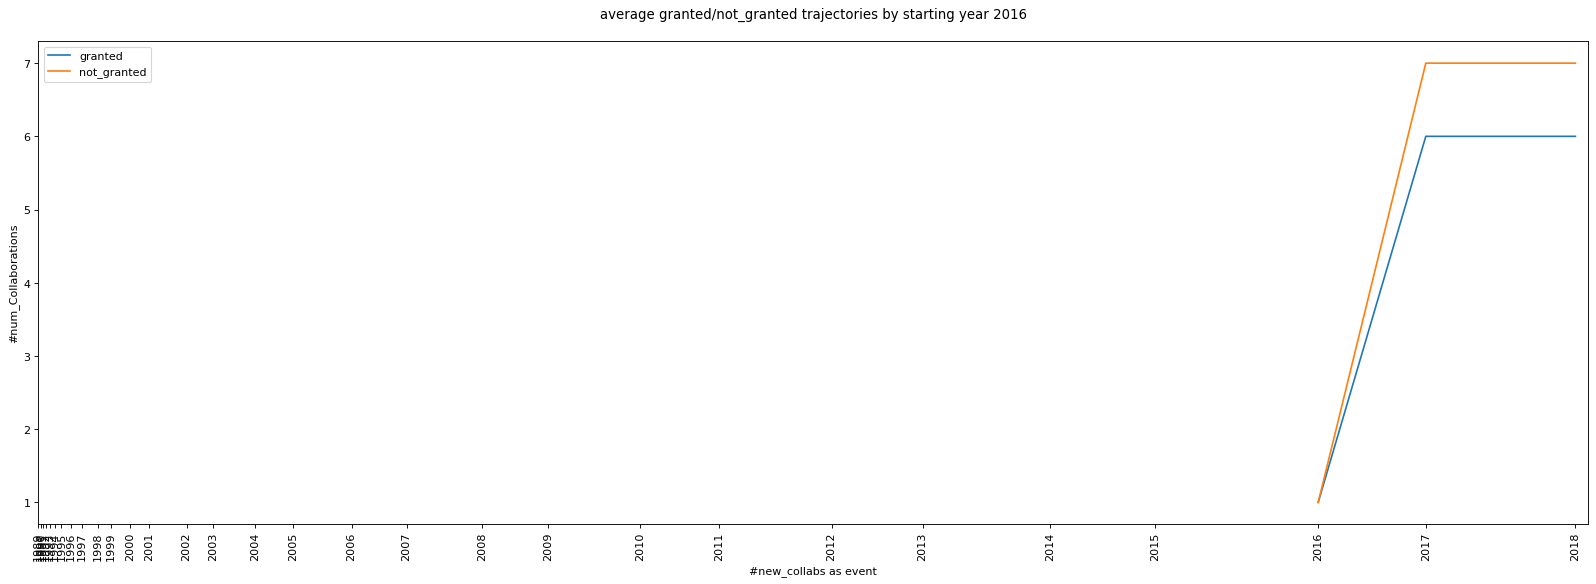

In [37]:
## plot avg granted/not_granted trajectories by starting year (one by one)

for start_y in YEARS:
    
    focal_x, focal_avg = get_focals_avg_trajectories(EVENTS, start_y, START_Y_DISTANCE)
    control_x, control_avg = get_controls_avg_trajectories(EVENTS, start_y, START_Y_DISTANCE)

    if(focal_avg != [] and control_avg != []):
        plt.figure(figsize=(25, 8), dpi=80)
        plt.title("average granted/not_granted trajectories by starting year " + start_y + "\n", fontdict = {'fontsize' : 12})
        plt.xlabel("#new_collabs as event")
        plt.ylabel("#num_Collaborations")
        plt.xticks(rotation='vertical')
        
        plt.plot(focal_x, focal_avg, label="granted")
        plt.plot(control_x, control_avg, label="not_granted")

        plt.legend(loc='upper left')
        plt.xticks(EVENTS, YEARS)
        plt.show()


# (2) **SHIFT of real data to perform a weighted average**

In [42]:
for start_y in YEARS:
    focal_x, focal_avg = get_focals_avg_trajectories(EVENTS, start_y, START_Y_DISTANCE) 
    control_x, control_avg = get_controls_avg_trajectories(EVENTS, start_y, START_Y_DISTANCE) 
    print(start_y, len(focal_avg), len(control_avg))
    break

1989 0 30


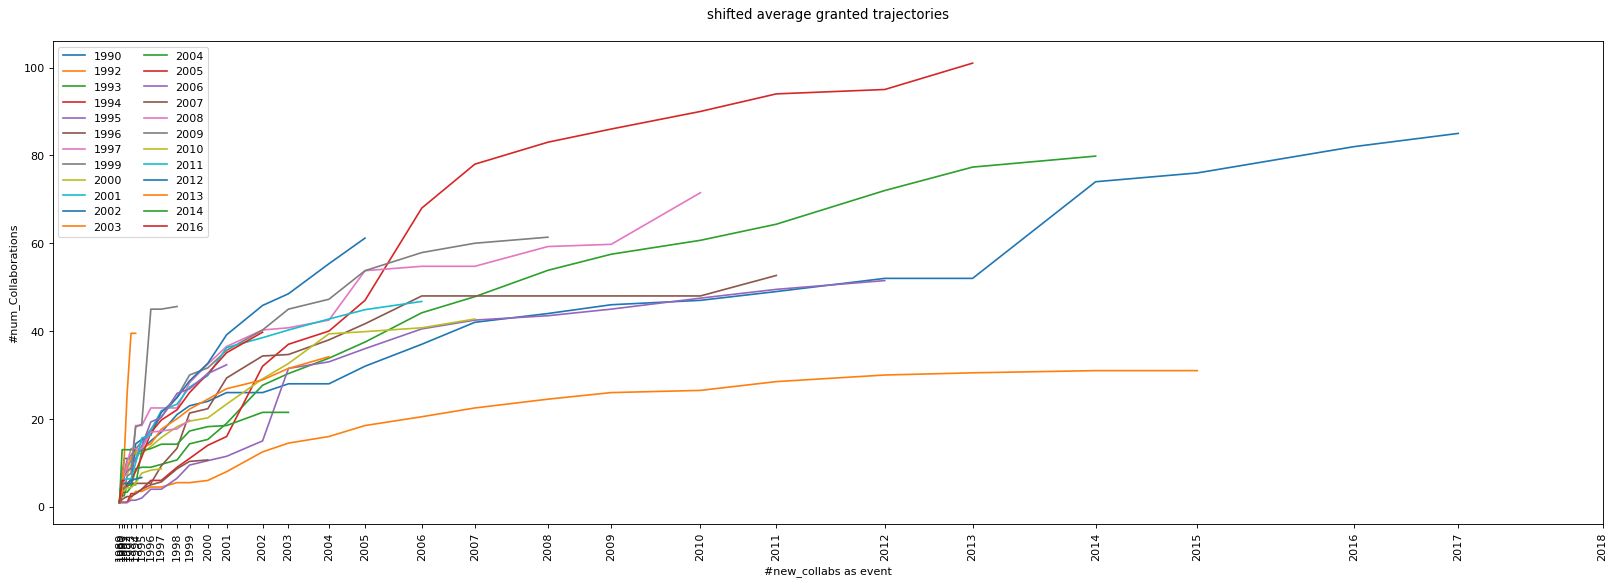

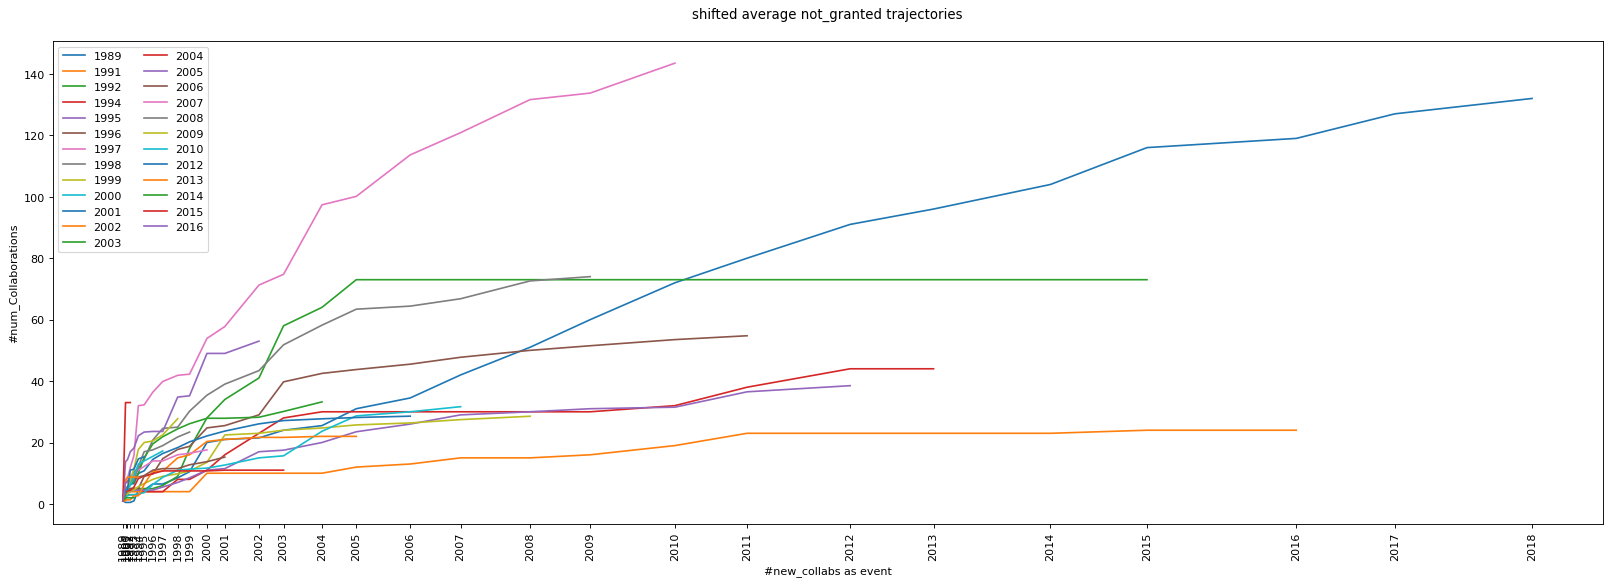

In [39]:
## plot shifted average granted trajectories (all at once)
plt.figure(figsize=(25, 8), dpi=80)
plt.title("shifted average granted trajectories\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

for start_y in YEARS:
    focal_x, focal_avg = get_focals_avg_trajectories(EVENTS, start_y, START_Y_DISTANCE) 
    # use the shifted the x axis     
    if(focal_avg != []):
        plt.plot(EVENTS[:len(focal_x)], focal_avg, label=start_y)
    
plt.legend(loc='upper left', ncol=2)
plt.xticks(EVENTS, YEARS)
plt.show()

## plot shifted average not_granted trajectories (all at once)
plt.figure(figsize=(25, 8), dpi=80)
plt.title("shifted average not_granted trajectories\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

for start_y in YEARS:    
    control_x, control_avg = get_controls_avg_trajectories(EVENTS, start_y, START_Y_DISTANCE) 
    # use the shifted the x axis     
    if(control_avg != []):
        plt.plot(EVENTS[:len(control_x)], control_avg, label=start_y)

plt.legend(loc='upper left', ncol=2)
plt.xticks(EVENTS, YEARS)
plt.show()


## (2.1) **computing weighted average**

In [40]:
# compute the average for previously shifted average trajectories wighted by the number of authors associated with each year

# arrays containing the weighted averages
shift_granted_avg, shift_not_granted_avg = [0 for i in range(len(EVENTS)-1)], [0 for i in range(len(EVENTS)-1)]

for start_y in YEARS[1:]:
    focal_x, focal_avg = get_focals_avg_trajectories(EVENTS, start_y, START_Y_DISTANCE)  # average trajectory associated with the starting year 
    num_focal = len(granted[granted["start_year"]==int(start_y)]) # number of authors associated with the starting year  
    
    control_x, control_avg = get_controls_avg_trajectories(EVENTS, start_y , START_Y_DISTANCE) # average trajectory associated with the starting year 
    num_control = len(not_granted[not_granted["start_year"]==int(start_y)]) # number of authors associated with the starting year  
    
    # sum all average values for the given year weighted by the number of authors in that year
    for i in range(len(focal_avg)) :
        if(focal_avg == []):
            shift_granted_avg[i] +=  0
        else:
            shift_granted_avg[i] += num_focal*focal_avg[i] 
        
        if(control_avg == []):
            shift_not_granted_avg[i] +=  0
        else:
            shift_not_granted_avg[i] += num_control*control_avg[i]   
         
# divide each value for the number of functions that partecipated in the sum
d = len(EVENTS)-1
for i in range(len(EVENTS)-1):
    shift_granted_avg[i] = shift_granted_avg[i]/d
    shift_not_granted_avg[i] = shift_not_granted_avg[i]/d
    d = d-1
    

shift_granted_avg.insert(0,1)
shift_not_granted_avg.insert(0,1)

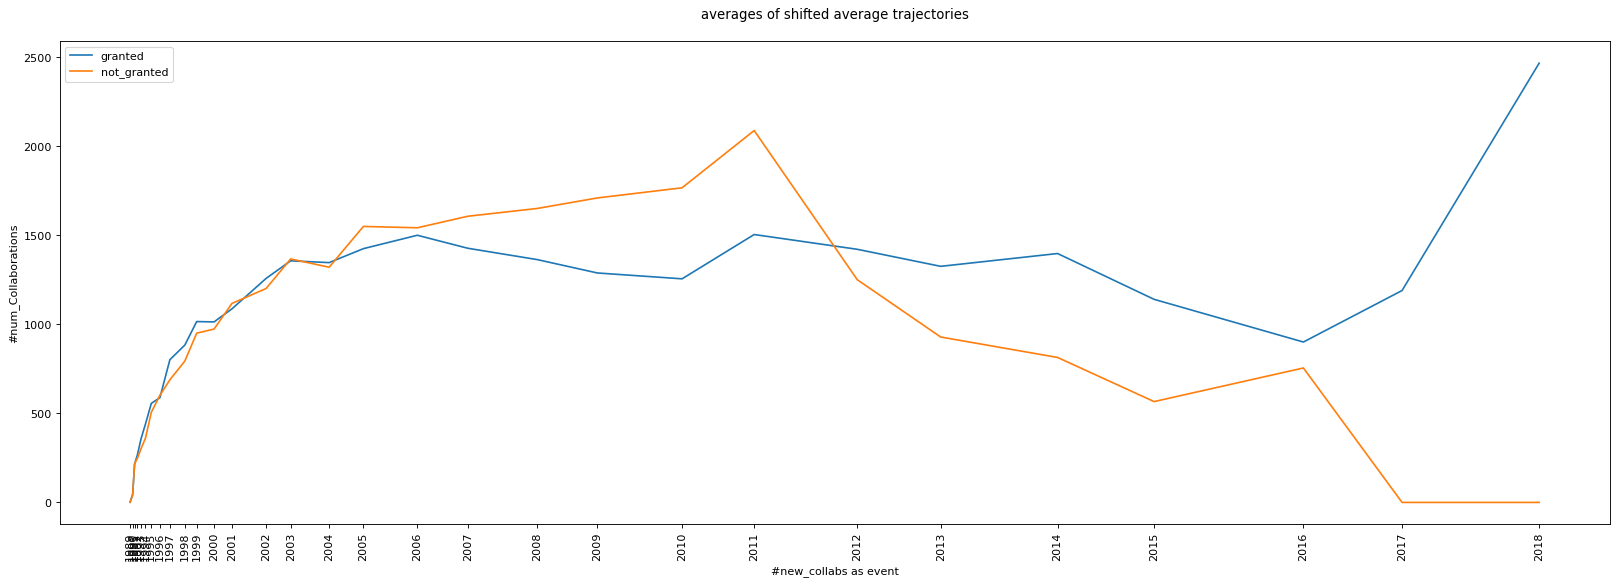

In [41]:
# plot the average of the shifted average trajectories both for granted and not
plt.figure(figsize=(25, 8), dpi=80)
plt.title("averages of shifted average trajectories\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

plt.plot(EVENTS, shift_granted_avg, label="granted")
plt.plot(EVENTS, shift_not_granted_avg, label="not_granted")

plt.legend(loc='upper left')
plt.xticks(EVENTS, YEARS)
plt.show()

# (3) **FIT real data and SHIFT the fitting**

In [11]:
# get rid of misleading years
YEARS_TO_CONSIDER = YEARS[1: -3]
EVENTS_TO_CONSIDER = EVENTS[1: -3]

## (3.1) - Granted

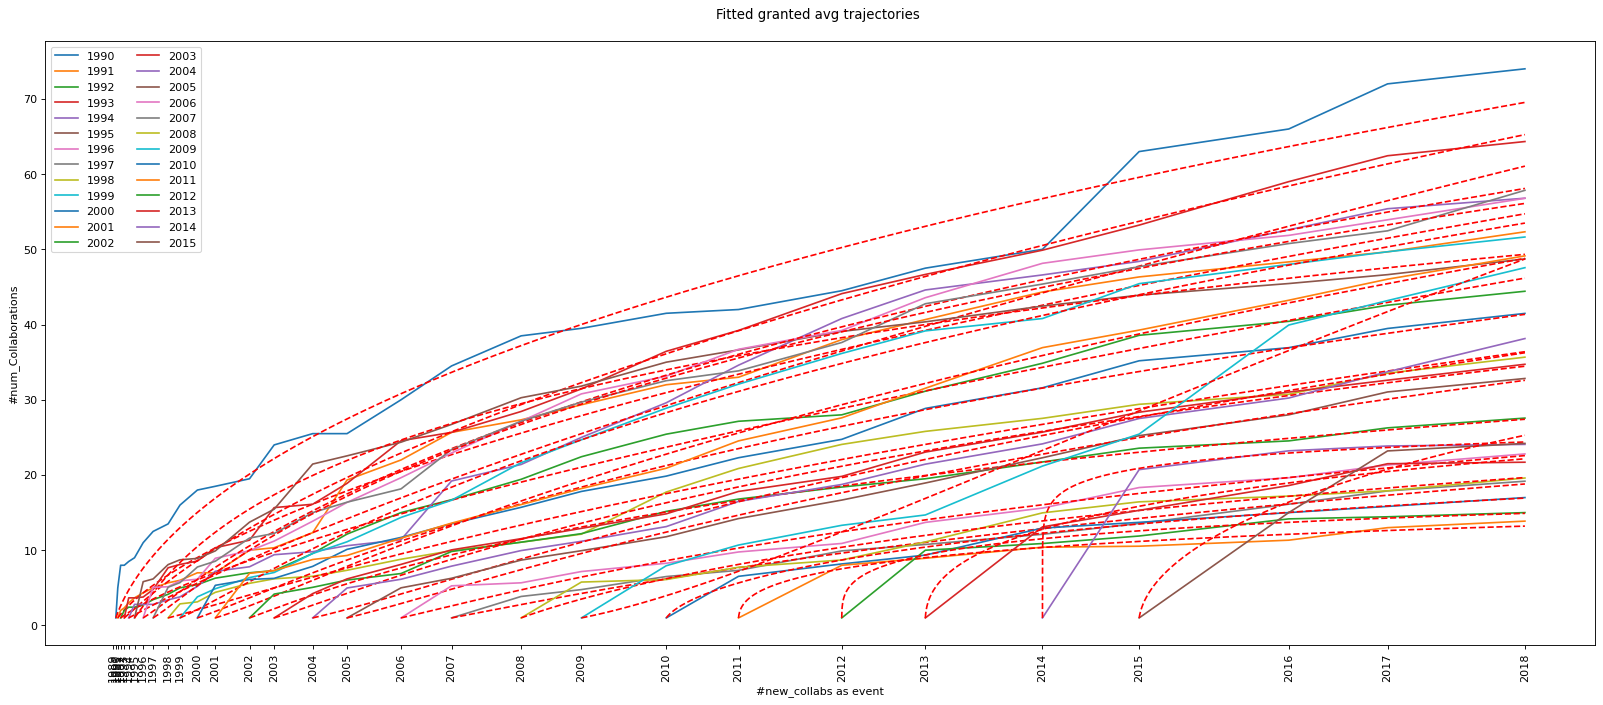

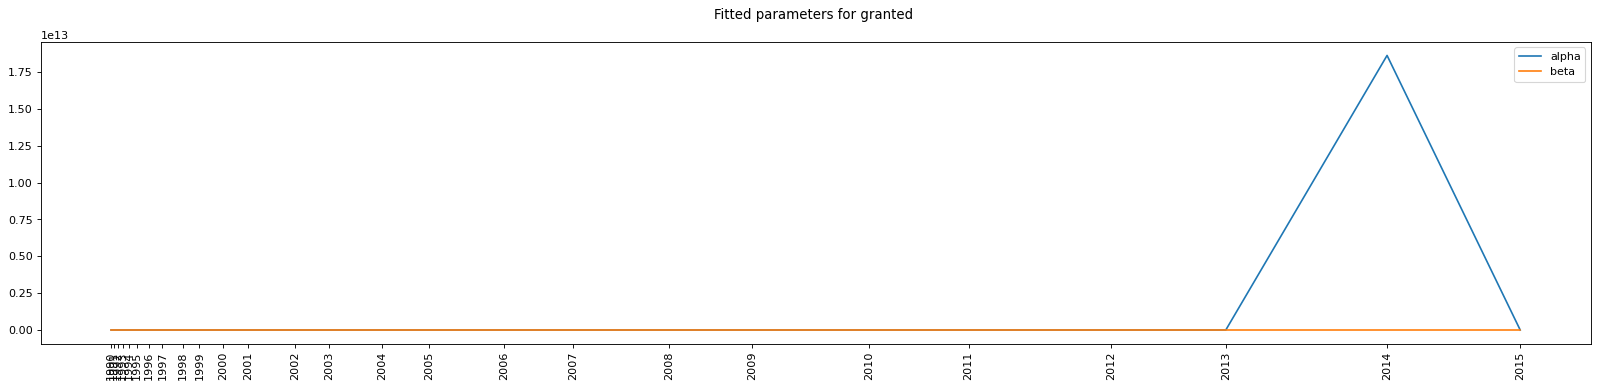

   start_y  granted_alphas  granted_beta
0     1990    1.692126e-01      5.838335
1     1991    6.747203e-02     12.217839
2     1992    1.170493e-02     64.197753
3     1993    2.439101e-01      5.349252
4     1994    9.939949e-02     11.089233
5     1995    2.292976e+00      1.649963
6     1996    9.616430e-01      2.622306
7     1997    1.611964e+00      2.109066
8     1998    5.073495e-01      3.691187
9     1999    1.829324e+00      2.111738
10    2000    1.855244e+00      2.034338
11    2001    1.936074e+00      2.152580
12    2002    5.113631e+00      1.292527
13    2003    4.308536e+00      1.514248
14    2004    3.427115e+00      1.758206
15    2005    4.851762e+00      1.531646
16    2006    7.241678e+00      1.233462
17    2007    6.920220e+00      1.228987
18    2008    2.283155e+01      0.881432
19    2009    6.789693e+00      1.816463
20    2010    1.818141e+02      0.549990
21    2011    2.640107e+03      0.336290
22    2012    5.596268e+04      0.256811
23    2013    5.

In [12]:
## Plot fitted average trjectories for granted
plt.figure(figsize=(25, 10), dpi=80)
plt.title("Fitted granted avg trajectories \n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

granted_alphas = []
granted_betas = []
for start_y in YEARS_TO_CONSIDER:
        
    # get focal's trajectories 
    x,y = get_focals_avg_trajectories(EVENTS, start_y, START_Y_DISTANCE)
    
    if(y != []):
        fit_y, alpha, beta = fit_trajectory(x, y) # fit the real data above with the theoretical trajectory 
        xdata = [a for a in range(x[0], x[-1])]
        fit_y = theoretical_func(xdata, alpha, beta, x[0])
        
        plt.plot(x,y, label=str(start_y))
        plt.plot(xdata,fit_y, 'r--')
      
        plt.xticks(rotation='vertical')
    else:
        alpha = 0
        beta = 0
        
    # save fitted parameters alpha, beta
    granted_alphas.append(alpha)
    granted_betas.append(beta)
    
plt.legend(loc='upper left', ncol=2)
plt.xticks(EVENTS, YEARS)
plt.show()


## Plotting and Printing fitted parameters alpha and beta for each starting year
plt.figure(figsize=(25, 5), dpi=80)
plt.title("Fitted parameters for granted \n", fontdict = {'fontsize' : 12})
plt.plot(EVENTS_TO_CONSIDER, granted_alphas, label="alpha")
plt.plot(EVENTS_TO_CONSIDER, granted_betas, label="beta")
plt.xticks(EVENTS_TO_CONSIDER, YEARS_TO_CONSIDER)
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

print(pd.DataFrame([[YEARS_TO_CONSIDER[i], granted_alphas[i], granted_betas[i]] for i in range(len(granted_alphas)) if granted_alphas[i]!=0], columns=["start_y", "granted_alphas", "granted_beta"]))

In [13]:
# Shift all fits
granted_shifted_funcs = []
for i in range(len(granted_alphas)):
    
    x,y = get_focals_avg_trajectories(EVENTS, YEARS_TO_CONSIDER[i], START_Y_DISTANCE)

    xdata = [e+x[0] for e in ALL_EVENTS]            
    f = theoretical_func(xdata, granted_alphas[i], granted_betas[i], x[0])

    granted_shifted_funcs.append(f) # add function to the set

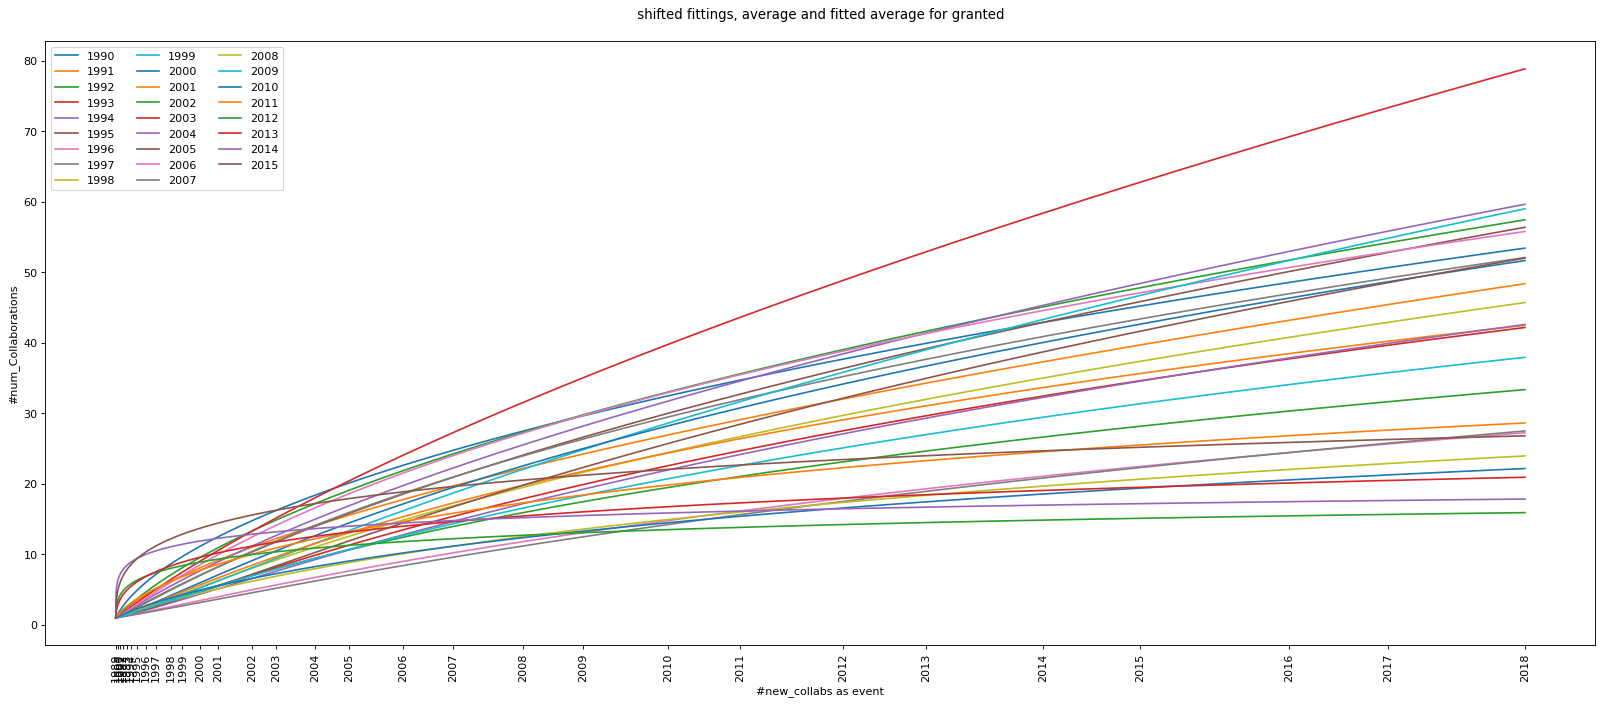

In [ ]:
# plot the shifted trajectories 

plt.figure(figsize=(25, 10), dpi=80)
plt.title(" shifted fittings, average and fitted average for granted \n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

j = 0
for start_y in YEARS_TO_CONSIDER:
    plt.plot(ALL_EVENTS,granted_shifted_funcs[j], label=start_y)
    j += 1
    
plt.xticks(rotation='vertical')    
plt.legend(loc='upper left', ncol=3)

plt.xticks(EVENTS, YEARS)
plt.show()


## (3.2) - Not Granted

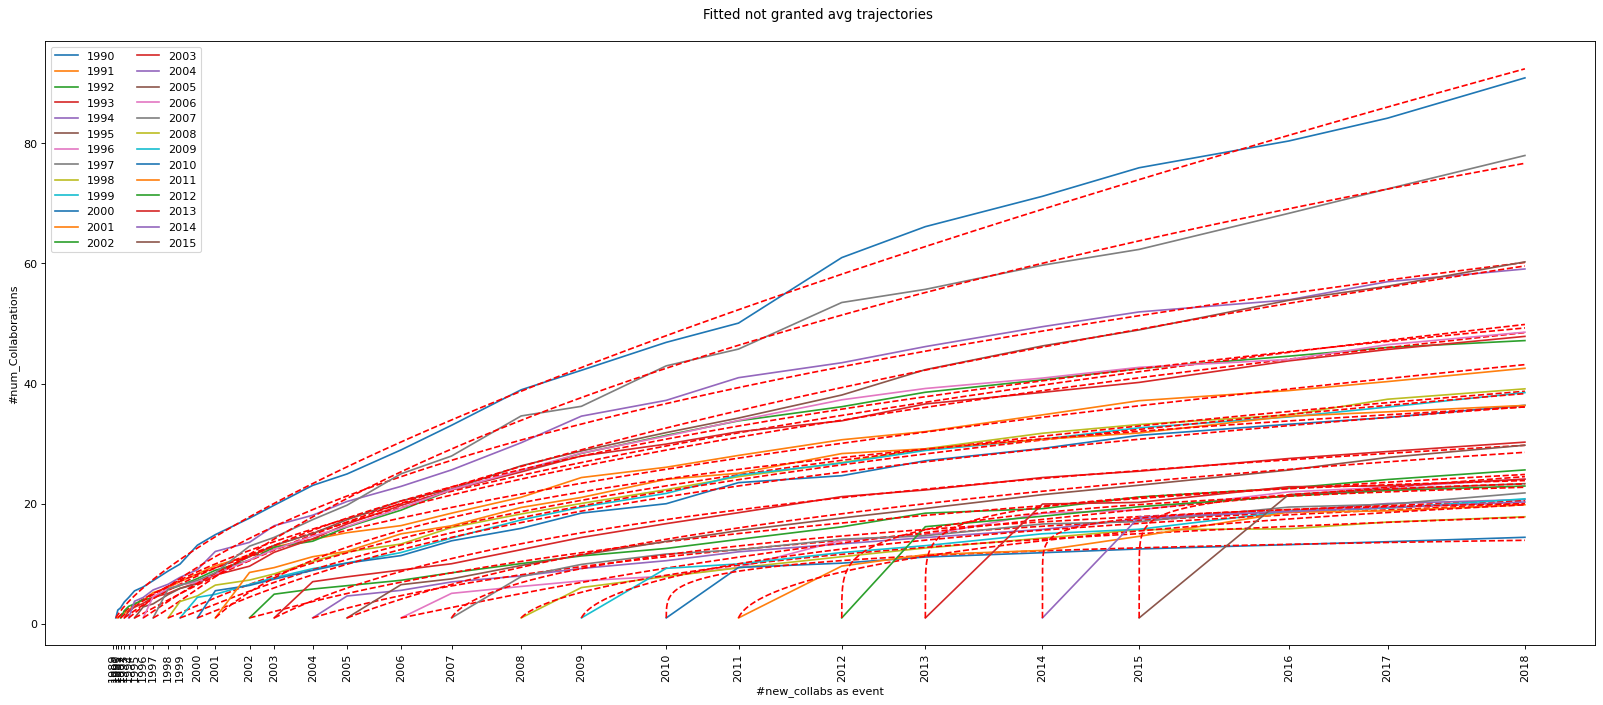

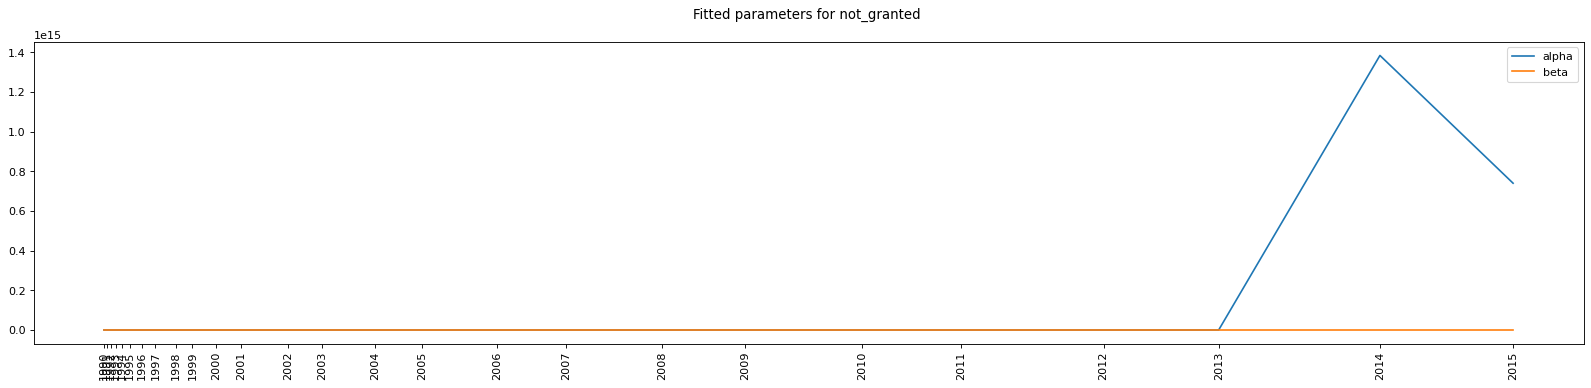

   start_y  not_granted_alpha  not_granted_betas
0     1990       9.699312e-03          76.172683
1     1991       9.010162e-02           9.024665
2     1992       2.021043e-01           5.400299
3     1993       3.230344e-01           4.115260
4     1994       6.893304e-01           2.896941
5     1995       4.676423e-01           3.763450
6     1996       1.520872e+00           2.023192
7     1997       1.488182e+00           2.355861
8     1998       2.009897e+00           1.811133
9     1999       2.266587e+00           1.762146
10    2000       3.608359e+00           1.485941
11    2001       1.697324e+01           0.938851
12    2002       4.514295e+00           1.313199
13    2003       1.344024e+01           0.995373
14    2004       1.055677e+01           0.979129
15    2005       1.465586e+01           1.012956
16    2006       7.820282e+00           1.231329
17    2007       1.773164e+02           0.545285
18    2008       1.298070e+02           0.565205
19    2009       2.9

In [ ]:
## Plot fitted average trjectories for not granted
plt.figure(figsize=(25, 10), dpi=80)
plt.title("Fitted not granted avg trajectories \n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

not_granted_alphas = []
not_granted_betas = []
for start_y in YEARS_TO_CONSIDER:
    
    # get control's trajectories 
    x,y = get_controls_avg_trajectories(EVENTS, start_y, START_Y_DISTANCE)
    
    if(y != []):
        fit_y, alpha, beta = fit_trajectory(x, y) # fit the real data above with the theoretical trajectory 
        
        xdata = [a for a in range(x[0], x[-1])]
        fit_y = theoretical_func(xdata, alpha, beta, x[0])
        
        plt.plot(x,y, label=str(start_y))
        plt.plot(xdata,fit_y, 'r--')
      
        plt.xticks(rotation='vertical')
    else:
        alpha = 0
        beta = 0
        
    # save fitted parameters alpha, beta
    not_granted_alphas.append(alpha)
    not_granted_betas.append(beta)
    
plt.legend(loc='upper left', ncol=2)
plt.xticks(EVENTS, YEARS)
plt.show()


## Plotting and Printing fitted parameters alpha and beta for each starting year
plt.figure(figsize=(25, 5), dpi=80)
plt.title("Fitted parameters for not_granted \n", fontdict = {'fontsize' : 12})
plt.plot(EVENTS_TO_CONSIDER, not_granted_alphas, label="alpha")
plt.plot(EVENTS_TO_CONSIDER, not_granted_betas, label="beta")
plt.xticks(EVENTS_TO_CONSIDER, YEARS_TO_CONSIDER)
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

print(pd.DataFrame([[YEARS_TO_CONSIDER[i], not_granted_alphas[i], not_granted_betas[i]] for i in range(len(not_granted_alphas)) if not_granted_alphas[i]!=0], columns=["start_y", "not_granted_alpha", "not_granted_betas"]))

In [ ]:
# Shift all fitted trajectories
not_granted_shifted_funcs = []
for i in range(len(not_granted_alphas)):
    
    x,y = get_controls_avg_trajectories(EVENTS, YEARS_TO_CONSIDER[i], START_Y_DISTANCE)

    xdata = [e+x[0] for e in ALL_EVENTS]            
    f = theoretical_func(xdata, not_granted_alphas[i], not_granted_betas[i], x[0])

    not_granted_shifted_funcs.append(f) # add function to the set

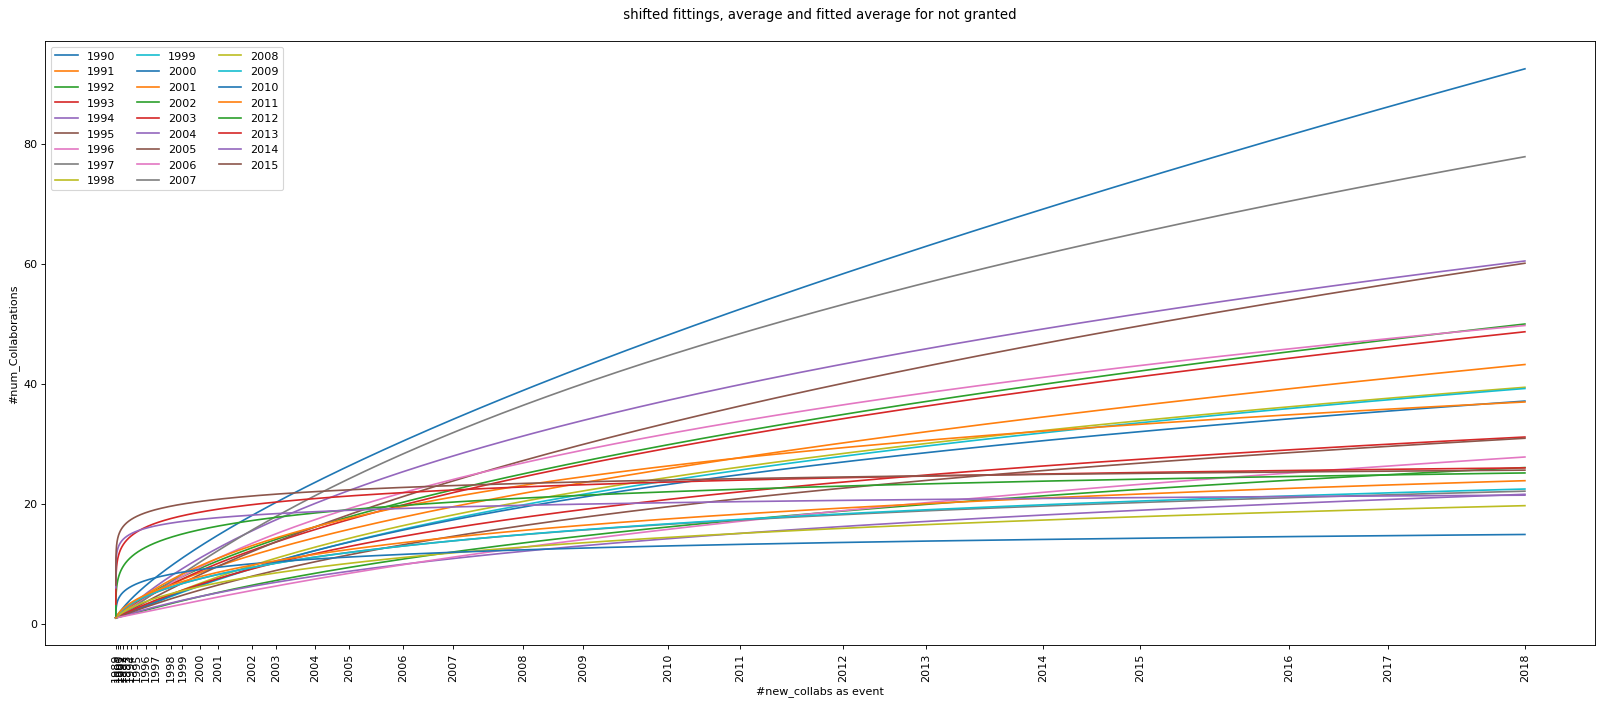

In [ ]:
plt.figure(figsize=(25, 10), dpi=80)
plt.title(" shifted fittings, average and fitted average for not granted \n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

j=0
for start_y in YEARS_TO_CONSIDER:
    plt.plot(ALL_EVENTS,not_granted_shifted_funcs[j], label=start_y)
    j+=1
    
plt.xticks(rotation='vertical')    
plt.legend(loc='upper left', ncol=3)

plt.xticks(EVENTS, YEARS)
plt.show()


# (4) **weighted AVERAGE over the shifted fittings**

In [27]:
## NOT GRANTED ##

# compute the average of the shifted functions
shift_not_granted_avg = [0 for i in range(len(EVENTS))]
j = 0
for start_y in YEARS_TO_CONSIDER:
    
    control_avg = not_granted_shifted_funcs[j]
    j+=1
    
    num_control = len(not_granted[not_granted["start_year"]==int(start_y)])
    
    # sum all average values for the given year weighted by the number of authors in that year
    for i in range(len(control_avg)) :
        print(i)
        if(control_avg == []):
            shift_not_granted_avg[i] +=  0
        else:
            shift_not_granted_avg[i] += num_control*control_avg[i]  
                  
# divide each value for the number of functions that partecipated in the sum
d = len(EVENTS)
for i in range(len(EVENTS)):
    shift_not_granted_avg[i] = shift_not_granted_avg[i]/d

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


IndexError: list index out of range

In [148]:
## NOT GRANTED ##

# compute the average of the shifted functions
shift_not_granted_avg = [0 for i in range(len(EVENTS))]
j = 0
for start_y in YEARS_TO_CONSIDER:
    
    control_avg = not_granted_shifted_funcs[j]
    j+=1
    
    num_control = len(not_granted[not_granted["start_year"]==int(start_y)])
    
    # sum all average values for the given year weighted by the number of authors in that year
    for i in range(len(focal_avg)) :
        if(control_avg == []):
            shift_not_granted_avg[i] +=  0
        else:
            shift_not_granted_avg[i] += num_control*control_avg[i]  
                  
    print(start_y, control_avg, num_control, shift_not_granted_avg)

# divide each value for the number of functions that partecipated in the sum
d = len(EVENTS)
for i in range(len(EVENTS)):
    shift_not_granted_avg[i] = shift_not_granted_avg[i]/d


## GRANTED ## 

# compute the average of the shifted functions
shift_granted_avg = [0 for i in range(len(EVENTS)+1)]

for start_y in YEARS[:-1]:
    # if(start_y not in ["2008", "2010", "2007", "2006", "2005"]): # highest curves
    j = YEARS.index(start_y)
    focal_avg = granted_shifted_funcs[j]
    num_focal = len(granted[granted["start_year"]==int(start_y)])
    
    # sum all average values for the given year weighted by the number of authors in that year
    for i in range(len(focal_avg)) :
        if(focal_avg == []):
            shift_granted_avg[i] +=  0
        else:
            shift_granted_avg[i] += num_focal*focal_avg[i] 
        
# divide each value for the number of functions that partecipated in the sum
d = len(EVENTS)
for i in range(len(EVENTS)):
    shift_granted_avg[i] = shift_granted_avg[i]/d

2017 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] 0 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


/tmp/ipykernel_6496/1137336297.py:16: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(control_avg == []):
/tmp/ipykernel_6496/1137336297.py:43: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(focal_avg == []):


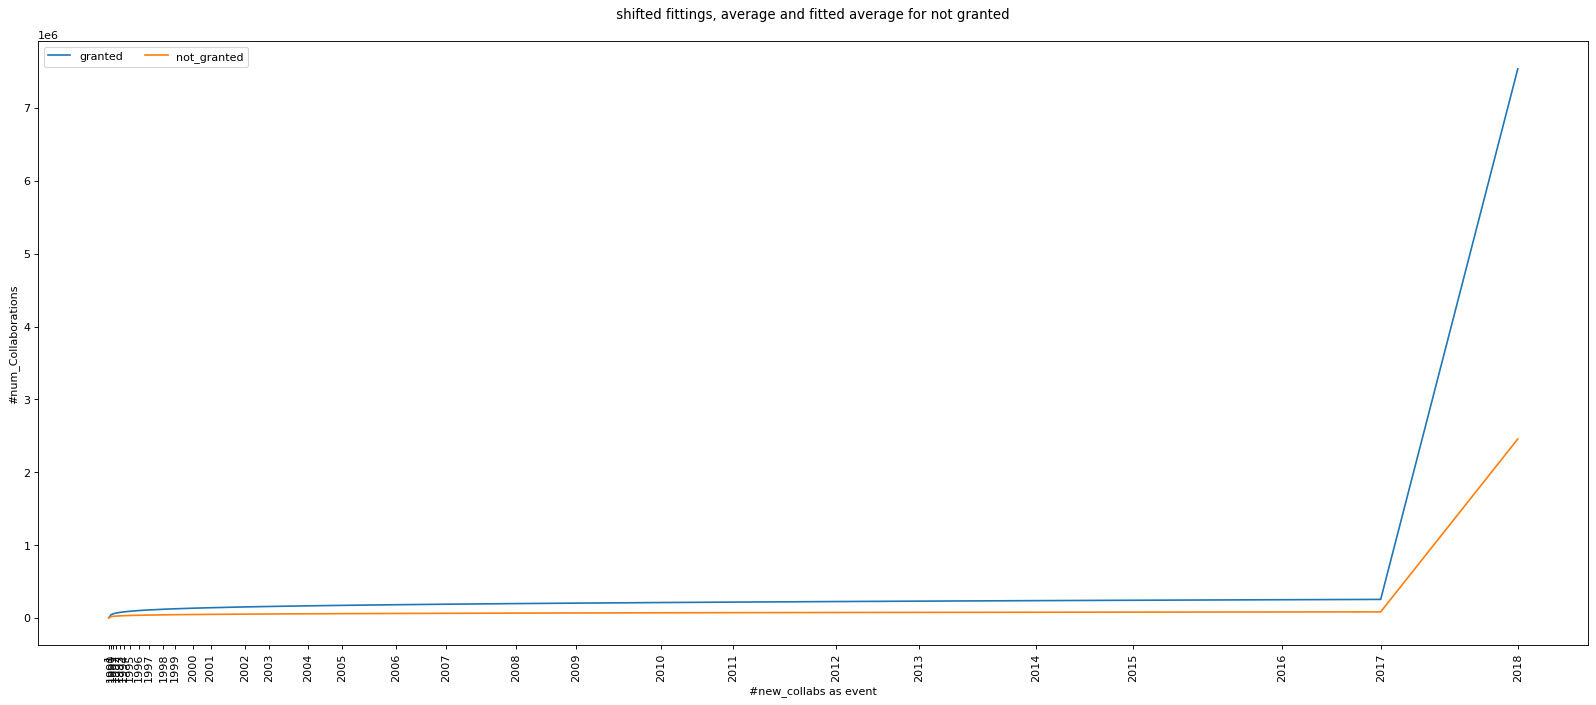

In [136]:
shift_granted_avg
shift_not_granted_avg

plt.figure(figsize=(25, 10), dpi=80)
plt.title(" shifted fittings, average and fitted average for not granted \n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

plt.plot(events_plus1,shift_granted_avg, label="granted")    
plt.plot(events_plus1,shift_not_granted_avg, label="not_granted")

plt.xticks(rotation='vertical')    
plt.legend(loc='upper left', ncol=3)

x_labels = get_str_years_event()
x_labels.insert(0,1)
plt.xticks(events_plus1, x_labels)
plt.show()

In [137]:
len(shift_granted_avg)

30